#### First file for 2025 global jobs trends dataset obtained from Kaggle on 10/06/2025. 
-- The first file is to understand data while continuing to focus on the overarching current research question. 
-- "How does salary change for an increase in avaailable jobs by category globally (by country). 

### import libraries, load data, data review
### What is the data?

In [1]:
# Load dataset with CSV first, then Excel fallback
import os
import pandas as pd

csv_path = 'dfall_clean.csv'
#excel_path = 'dfall_clean.xlsx'

def load_data():
    if os.path.exists(csv_path):
        print(f"Found {csv_path}, loading CSV...")
        df = pd.read_csv(csv_path)
    #elif os.path.exists(excel_path):
        #print(f"CSV not found. Found {excel_path}, loading Excel...")
        #df = pd.read_excel(excel_path)
    #else:
        #raise FileNotFoundError(f"Neither {csv_path} nor {excel_path} were found in the current directory.")
    print('Dataframe shape:', df.shape)
    display(df.head())
    return df

# Execute load
df = load_data()

Found dfall_clean.csv, loading CSV...
Dataframe shape: (4000, 20)


,id,title,company_name,category_label,category_tag,country,location_display,location_area,latitude,longitude,contract_type,contract_time,salary_min,salary_max,salary_mid,salary_is_predicted,created_dt,created_date,redirect_url,adref
0,5410474609,Mechanical Pipefitter,Dodd Group,Trade & Construction Jobs,trade-construction-jobs,United Kingdom,"King's Lynn, Norfolk",UK > Eastern England > Norfolk > King's Lynn,52.751999,0.395357,permanent,full_time,40518.74,40518.74,40518.74,1,2025-09-22 09:28:13+00:00,2025-09-22,https://www.adzuna.co.uk/jobs/details/54104746...,eyJhbGciOiJIUzI1NiJ9.eyJpIjoiNTQxMDQ3NDYwOSIsI...
1,5381519011,International Trade Policy Editor [Startup Pol...,Applio Ventures,Graduate Jobs,graduate-jobs,United Kingdom,"London, UK",UK > London,NaN,NaN,permanent,full_time,64000.00,64000.00,64000.00,0,2025-09-03 21:20:59+00:00,2025-09-03,https://www.adzuna.co.uk/jobs/details/53815190...,eyJhbGciOiJIUzI1NiJ9.eyJpIjoiNTM4MTUxOTAxMSIsI...
2,5389371380,Domestic Cleaner,Maid2Clean Suffolk Ltd,Domestic help & Cleaning Jobs,domestic-help-cleaning-jobs,United Kingdom,"Diss, Norfolk",UK > Eastern England > Norfolk > Diss,52.377602,1.106380,permanent,part_time,13.00,13.00,13.00,0,2025-09-08 15:49:25+00:00,2025-09-08,https://www.adzuna.co.uk/jobs/details/53893713...,eyJhbGciOiJIUzI1NiJ9.eyJzIjoiRWtwZjc5cWI4QkdZM...
3,5403097985,Early Years BABY Room Leader,Jesters Childcare Essex,Teaching Jobs,teaching-jobs,United Kingdom,UK,UK,NaN,NaN,permanent,full_time,26707.00,29494.00,28100.50,0,2025-09-17 15:00:12+00:00,2025-09-17,https://www.adzuna.co.uk/jobs/details/54030979...,eyJhbGciOiJIUzI1NiJ9.eyJpIjoiNTQwMzA5Nzk4NSIsI...
4,5400306117,Senior Back-End Engineer,Eligible Limited,IT Jobs,it-jobs,United Kingdom,UK,UK,NaN,NaN,permanent,full_time,80000.00,NaN,80000.00,0,2025-09-15 17:51:23+00:00,2025-09-15,https://www.adzuna.co.uk/jobs/details/54003061...,eyJhbGciOiJIUzI1NiJ9.eyJzIjoiRWtwZjc5cWI4QkdZM...


In [2]:
# Imports
import os, re, datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_theme()

In [3]:
# Quick verification of loaded dataframe
print('DataFrame info:')
print('-'*40)
df.info()
print('\nFirst 5 rows:')
print('-'*40)
display(df.head())

DataFrame info:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   4000 non-null   int64  
 1   title                4000 non-null   object 
 2   company_name         3786 non-null   object 
 3   category_label       4000 non-null   object 
 4   category_tag         4000 non-null   object 
 5   country              4000 non-null   object 
 6   location_display     4000 non-null   object 
 7   location_area        4000 non-null   object 
 8   latitude             3257 non-null   float64
 9   longitude            3257 non-null   float64
 10  contract_type        846 non-null    object 
 11  contract_time        985 non-null    object 
 12  salary_min           1544 non-null   float64
 13  salary_max           1535 non-null   float64
 14  salary_mid           1544 non-n

,id,title,company_name,category_label,category_tag,country,location_display,location_area,latitude,longitude,contract_type,contract_time,salary_min,salary_max,salary_mid,salary_is_predicted,created_dt,created_date,redirect_url,adref
0,5410474609,Mechanical Pipefitter,Dodd Group,Trade & Construction Jobs,trade-construction-jobs,United Kingdom,"King's Lynn, Norfolk",UK > Eastern England > Norfolk > King's Lynn,52.751999,0.395357,permanent,full_time,40518.74,40518.74,40518.74,1,2025-09-22 09:28:13+00:00,2025-09-22,https://www.adzuna.co.uk/jobs/details/54104746...,eyJhbGciOiJIUzI1NiJ9.eyJpIjoiNTQxMDQ3NDYwOSIsI...
1,5381519011,International Trade Policy Editor [Startup Pol...,Applio Ventures,Graduate Jobs,graduate-jobs,United Kingdom,"London, UK",UK > London,NaN,NaN,permanent,full_time,64000.00,64000.00,64000.00,0,2025-09-03 21:20:59+00:00,2025-09-03,https://www.adzuna.co.uk/jobs/details/53815190...,eyJhbGciOiJIUzI1NiJ9.eyJpIjoiNTM4MTUxOTAxMSIsI...
2,5389371380,Domestic Cleaner,Maid2Clean Suffolk Ltd,Domestic help & Cleaning Jobs,domestic-help-cleaning-jobs,United Kingdom,"Diss, Norfolk",UK > Eastern England > Norfolk > Diss,52.377602,1.106380,permanent,part_time,13.00,13.00,13.00,0,2025-09-08 15:49:25+00:00,2025-09-08,https://www.adzuna.co.uk/jobs/details/53893713...,eyJhbGciOiJIUzI1NiJ9.eyJzIjoiRWtwZjc5cWI4QkdZM...
3,5403097985,Early Years BABY Room Leader,Jesters Childcare Essex,Teaching Jobs,teaching-jobs,United Kingdom,UK,UK,NaN,NaN,permanent,full_time,26707.00,29494.00,28100.50,0,2025-09-17 15:00:12+00:00,2025-09-17,https://www.adzuna.co.uk/jobs/details/54030979...,eyJhbGciOiJIUzI1NiJ9.eyJpIjoiNTQwMzA5Nzk4NSIsI...
4,5400306117,Senior Back-End Engineer,Eligible Limited,IT Jobs,it-jobs,United Kingdom,UK,UK,NaN,NaN,permanent,full_time,80000.00,NaN,80000.00,0,2025-09-15 17:51:23+00:00,2025-09-15,https://www.adzuna.co.uk/jobs/details/54003061...,eyJhbGciOiJIUzI1NiJ9.eyJzIjoiRWtwZjc5cWI4QkdZM...


In [4]:
# Load data
file_name = "dfall_clean.csv"
if not os.path.exists(file_name):
    print(f"File not found: {file_name}. Current working directory: {os.getcwd()}")
else:
    df = pd.read_csv(file_name)
    print(f"Loaded: {file_name}")
    print("Shape:", df.shape)
    print("Head:")
    print(df.head())

    # Understand data
    print("\nDataFrame info:")
    df.info()
    print("\nDimensions (ndim):", df.ndim)
    print("Shape:", df.shape)
    print("Column names:", df.columns.tolist())
    print("Data types:\n", df.dtypes)

Loaded: dfall_clean.csv
Shape: (4000, 20)
Head:
           id                                              title  \
0  5410474609                              Mechanical Pipefitter   
1  5381519011  International Trade Policy Editor [Startup Pol...   
2  5389371380                                   Domestic Cleaner   
3  5403097985                       Early Years BABY Room Leader   
4  5400306117                           Senior Back-End Engineer   

              company_name                 category_label  \
0               Dodd Group      Trade & Construction Jobs   
1          Applio Ventures                  Graduate Jobs   
2   Maid2Clean Suffolk Ltd  Domestic help & Cleaning Jobs   
3  Jesters Childcare Essex                  Teaching Jobs   
4         Eligible Limited                        IT Jobs   

                  category_tag         country      location_display  \
0      trade-construction-jobs  United Kingdom  King's Lynn, Norfolk   
1                graduate-jobs  

## Make intial data tyes updates Dates to date_time

In [5]:
# Convert 'created_dt' and 'created_date' columns to datetime type
df['created_dt'] = pd.to_datetime(df['created_dt'])
df['created_date'] = pd.to_datetime(df['created_date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   id                   4000 non-null   int64              
 1   title                4000 non-null   object             
 2   company_name         3786 non-null   object             
 3   category_label       4000 non-null   object             
 4   category_tag         4000 non-null   object             
 5   country              4000 non-null   object             
 6   location_display     4000 non-null   object             
 7   location_area        4000 non-null   object             
 8   latitude             3257 non-null   float64            
 9   longitude            3257 non-null   float64            
 10  contract_type        846 non-null    object             
 11  contract_time        985 non-null    object             
 12  salary_min          

## Observe missing data

In [7]:
# Step 1: Check for missing values in all columns
missing_summary = df.isna().sum().sort_values(ascending=False)
print("Missing values in key columns:")
print(missing_summary)

Missing values in key columns:
contract_type          3154
contract_time          3015
salary_max             2465
salary_min             2456
salary_mid             2456
latitude                743
longitude               743
company_name            214
redirect_url              0
created_date              0
created_dt                0
salary_is_predicted       0
id                        0
title                     0
location_area             0
location_display          0
country                   0
category_tag              0
category_label            0
adref                     0
dtype: int64


## Start Decsriptive statistics, summary and visual explanations

In [ ]:
df.describe()

### Summarize missing values

In [ ]:
# Step 1: Check for missing values in key columns
missing_summary = df.isnull().sum()
print("Missing values in columns:")
print(missing_summary)

In [ ]:
# Visualize missing data: counts per column and missingness heatmap

# Use existing summary if available, otherwise compute
_missing_counts = missing_summary.sort_values(ascending=False) if 'missing_summary' in globals() else df.isna().sum().sort_values(ascending=False)
_missing_pct = (_missing_counts / len(df) * 100).round(2)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

# Barplot of missing counts (with % annotations)
sns.barplot(x=_missing_counts.values, y=_missing_counts.index, ax=axes[0], palette='viridis')
axes[0].set_title('Missing values by column')
axes[0].set_xlabel('Missing count')
axes[0].set_ylabel('')
for i, (count, pct) in enumerate(zip(_missing_counts.values, _missing_pct.values)):
    axes[0].text(count, i, f'  {count} ({pct}%)', va='center')

# Heatmap of missingness pattern (first N rows for readability)
_n = min(600, len(df))
sns.heatmap(df.head(_n).isna(), ax=axes[1], cbar=False, yticklabels=False, cmap='viridis')
axes[1].set_title(f'Missingness pattern (first {_n} rows)')
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Rows')

plt.show()

In [ ]:
df.info()

### Translate category label to English

In [8]:
# Translate job titles to English -> 'title_en' (batched, with fallbacks)
import pandas as pd

try:
    from deep_translator import GoogleTranslator
    translator = GoogleTranslator(source='auto', target='en')
    backend = 'deep-translator'
except Exception as e:
    translator = None
    backend = None
    print("deep-translator not available. Install with: pip install deep-translator")

if 'title' not in df.columns:
    raise KeyError("Column 'title' not found in df.")

# Prepare titles as string dtype
_titles = df['title'].astype('string')

if translator is None:
    # Fallback: copy as-is if translator isn't available
    df['title_en'] = _titles
    print("No translator available; copied 'title' to 'title_en' without translation.")
else:
    # Cache unique values to minimize API calls
    uniq = pd.Series(_titles.dropna().unique())
    cache: dict[str, str] = {}

    # Translate in batches to be polite and robust
    batch_size = 100
    for i in range(0, len(uniq), batch_size):
        chunk = uniq.iloc[i:i+batch_size].tolist()
        try:
            # deep-translator supports batch translation
            translated = translator.translate_batch(chunk)
        except Exception:
            # Fallback to item-by-item if batch fails
            translated = []
            for t in chunk:
                try:
                    translated.append(translator.translate(t))
                except Exception:
                    translated.append(t)
        for src, tgt in zip(chunk, translated):
            cache[src] = tgt

    # Map back to full column, preserving NA
    df['title_en'] = _titles.map(lambda s: cache.get(s, pd.NA) if pd.notna(s) else pd.NA).astype('string')
    print(f"Translated {len(cache)} unique titles to English using {backend} -> stored in 'title_en'.")

# Optional: quick preview
display(df[['title', 'title_en']].head(10))

Translated 3291 unique titles to English using deep-translator -> stored in 'title_en'.


,title,title_en
0,Mechanical Pipefitter,Mechanical Pipefitter
1,International Trade Policy Editor [Startup Pol...,International Trade Policy Editor [Startup Pol...
2,Domestic Cleaner,Domestic Cleaner
3,Early Years BABY Room Leader,Early Years BABY Room Leader
4,Senior Back-End Engineer,Senior Back-End Engineer
5,Computer Systems Validation specialist,Computer Systems Validation specialist
6,Full Stack Software Engineer,Full Stack Software Engineer
7,Customer Operations Analyst,Customer Operations Analyst
8,Qualified British Sign Language (BSL) Interpre...,Qualified British Sign Language (BSL) Interpre...
9,Assembly Line Operative – Full Time,Assembly Line Operative – Full Time


In [9]:
# Detect language for each title (reuse pipeline from category_label) and create English translations as 'title_en'

# Ensure language detection dependency and function are available
try:
    from langdetect import detect_langs, DetectorFactory
except Exception:
    %pip install --quiet langdetect
    from langdetect import detect_langs, DetectorFactory

if 'detect_language' not in globals():
    DetectorFactory.seed = 0  # reproducible results
    def detect_language(text):
        try:
            s = str(text).strip()
            if not s:
                return ('und', 0.0, 'langdetect')
            langs = detect_langs(s)  # returns list like [en:0.99, de:0.01]
            if not langs:
                return ('und', 0.0, 'langdetect')
            best = langs[0]
            code = getattr(best, 'lang', None) or str(best).split(':', 1)[0]
            conf = float(getattr(best, 'prob', 0.0) or 0.0)
            return (code, conf, 'langdetect')
        except Exception:
            return ('und', 0.0, 'langdetect')

# 1) Safety checks
if 'df' not in globals() or 'title' not in df.columns:
    raise KeyError("DataFrame 'df' with column 'title' is required.")

# 2) Detect language on unique titles and map back
_titles = df['title'].astype('string')
uniq_titles = pd.Series(_titles.dropna().unique())

title_lang_map: dict[str, tuple[str, float, str]] = {}
for t in uniq_titles:
    code, conf, src = detect_language(t)
    title_lang_map[t] = (code, conf, src)

mapped = _titles.map(title_lang_map)
df['title_lang'] = mapped.apply(lambda x: x[0] if isinstance(x, tuple) else pd.NA).astype('string').astype('category')
df['title_lang_source'] = mapped.apply(lambda x: x[2] if isinstance(x, tuple) else pd.NA).astype('string')

# Human-readable language name (reuse code_to_name if available; else define minimal map)
if 'code_to_name' not in globals():
    code_to_name = {
        "en": "English", "de": "German", "nl": "Dutch", "it": "Italian",
        "fr": "French", "es": "Spanish", "pt": "Portuguese", "und": "Undetermined"
    }
df['title_lang_name'] = df['title_lang'].map(lambda c: code_to_name.get(str(c), "Other")).astype('category')

# Optional: quick summary
_title_lang_counts = df['title_lang'].value_counts(dropna=False)
_title_lang_pct = (_title_lang_counts / len(df) * 100).round(2)
title_lang_summary = (
    pd.DataFrame({"count": _title_lang_counts, "pct": _title_lang_pct})
      .rename_axis("lang")
      .reset_index()
      .sort_values("count", ascending=False)
)
print("Detected languages in title (by ISO code):")
display(title_lang_summary.head(20))

# 3) Translate titles to English -> 'title_en'
# Reuse an existing translator if available; else initialize one
_translator = globals().get('trans', None) or globals().get('translator', None)
if _translator is None:
    try:
        _translator = GoogleTranslator(source='auto', target='en')
    except Exception:
        _translator = None

# Build list of unique titles to translate (skip those already detected as English)
to_translate = [t for t in uniq_titles if (t in title_lang_map and title_lang_map[t][0] != 'en')]
title_en_map: dict[str, str] = {}

# Titles already English -> map to themselves
for t in uniq_titles:
    if t in title_lang_map and title_lang_map[t][0] == 'en':
        title_en_map[t] = t

# Translate remaining if translator available; else keep originals
if _translator and to_translate:
    bs = globals().get('batch_size', 100)
    for i in range(0, len(to_translate), bs):
        chunk = to_translate[i:i+bs]
        try:
            translated = _translator.translate_batch(chunk)
        except Exception:
            translated = []
            for s in chunk:
                try:
                    translated.append(_translator.translate(s))
                except Exception:
                    translated.append(s)
        for src, tgt in zip(chunk, translated):
            title_en_map[src] = tgt if (tgt is not None and str(tgt).strip() != "") else src
else:
    for s in to_translate:
        title_en_map[s] = s  # fallback: keep original

# Map back to full column
df['title_en'] = _titles.map(lambda s: title_en_map.get(s, s)).astype('string')

print(f"Created columns: 'title_lang', 'title_lang_source', 'title_lang_name', and 'title_en'. Preview:")
display(df[['title', 'title_lang', 'title_lang_name', 'title_lang_source', 'title_en']].head(10))

Detected languages in title (by ISO code):


,lang,count,pct
0,en,1482,37.05
1,de,1021,25.52
2,fr,304,7.60
3,it,219,5.48
4,es,191,4.78
5,pt,175,4.38
6,nl,120,3.00
7,af,82,2.05
8,ca,73,1.82
9,ro,60,1.50


Created columns: 'title_lang', 'title_lang_source', 'title_lang_name', and 'title_en'. Preview:


,title,title_lang,title_lang_name,title_lang_source,title_en
0,Mechanical Pipefitter,it,Italian,langdetect,Mechanical Pipefitter
1,International Trade Policy Editor [Startup Pol...,en,English,langdetect,International Trade Policy Editor [Startup Pol...
2,Domestic Cleaner,ro,Other,langdetect,Domestic Cleaner
3,Early Years BABY Room Leader,en,English,langdetect,Early Years BABY Room Leader
4,Senior Back-End Engineer,en,English,langdetect,Senior Back-End Engineer
5,Computer Systems Validation specialist,en,English,langdetect,Computer Systems Validation specialist
6,Full Stack Software Engineer,en,English,langdetect,Full Stack Software Engineer
7,Customer Operations Analyst,en,English,langdetect,Customer Operations Analyst
8,Qualified British Sign Language (BSL) Interpre...,en,English,langdetect,Qualified British Sign Language (BSL) Interpre...
9,Assembly Line Operative – Full Time,en,English,langdetect,Assembly Line Operative – Full Time


### category translation to English

In [10]:
from langdetect import detect_langs, DetectorFactory
import langid
import re

# Detect and label language for each category_label -> create 'category_label_lang' (+ name/source) and summary

if 'category_label' not in df.columns:
    raise KeyError("Column 'category_label' not found in df.")

# 1) Try optional detectors; fall back to lightweight heuristics
_langdetect = None
_langid = None
try:
    DetectorFactory.seed = 0  # deterministic
    _langdetect = True
except Exception:
    _langdetect = None

try:
    _langid = True
except Exception:
    _langid = None

# 2) Heuristic keyword/charset cues (lowercased)

_kw = {
    "de": [r"\bstellen\b", r"\bsonstige\b", r"\ballgemeine\b", r"ä|ö|ü|ß", r"\bschweiz\b"],
    "nl": [r"\bvacatures?\b", r"\bfinanci[eë]le\b", r"\bolie\b", r"\bgas\b", r"\bcommerc[e|i]e\b"],
    "it": [r"\bingegneria\b", r"\bcommercio\b", r"\bdettaglio\b"],
    "fr": [r"\btechnicien\b", r"\bcdi\b", r"\bh\/f\b", r"\bsuisse\b"],
    "es": [r"\bempleo?s?\b", r"\btrabaj[oa]s?\b", r"\bcomercio\b"],
    "en": [r"\bjobs?\b", r"\bgraduate\b", r"\bteaching\b", r"\bretail\b", r"\bit\b"],
}

def _heuristic_lang(s: str):
    t = s.lower()
    # prioritize clear signals first
    for code, pats in _kw.items():
        for p in pats:
            if re.search(p, t):
                return code, 0.70, "heuristic"
    # ascii-heavy and 'jobs' default to English
    if re.fullmatch(r"[a-z\s&/+-]+", t) and "job" in t:
        return "en", 0.60, "heuristic"
    return "und", 0.0, "heuristic"  # undetermined

# 3) Detection pipeline for a single string
def detect_language(s: str):
    s = ("" if s is None else str(s)).strip()
    if not s:
        return "und", 0.0, "empty"

    # Try langdetect with probabilities
    if _langdetect:
        try:
            cand = detect_langs(s)  # e.g., [en:0.99, fr:0.01]
            if cand:
                top = sorted(cand, key=lambda x: x.prob, reverse=True)[0]
                return top.lang, float(top.prob), "langdetect"
        except Exception:
            pass

    # Try langid
    if _langid:
        try:
            code, score = langid.classify(s)  # score ~ log-prob
            # Convert log-prob-like score to a bounded confidence proxy
            conf = 1.0 / (1.0 + pow(2.71828, -min(10.0, max(-10.0, score))))
            return code, float(conf), "langid"
        except Exception:
            pass

    # Heuristic fallback
    return _heuristic_lang(s)

# 4) Apply on unique values to minimize work
vals = pd.Series(df['category_label'].astype('string').dropna().unique())
lang_map = {}
for v in vals:
    code, conf, src = detect_language(v)
    lang_map[v] = (code, conf, src)

# 5) Map back to full column
res = df['category_label'].astype('string').map(lang_map)
df['category_label_lang'] = res.apply(lambda x: x[0] if isinstance(x, tuple) else pd.NA).astype('string').astype('category')
df['category_label_lang_source'] = res.apply(lambda x: x[2] if isinstance(x, tuple) else pd.NA).astype('string')

# Optional human-readable name
code_to_name = {
    "en": "English", "de": "German", "nl": "Dutch", "it": "Italian",
    "fr": "French", "es": "Spanish", "pt": "Portuguese", "und": "Undetermined"
}
df['category_label_lang_name'] = df['category_label_lang'].map(lambda c: code_to_name.get(str(c), "Other")).astype('category')

# 6) Summary
lang_counts = df['category_label_lang'].value_counts(dropna=False)
lang_pct = (lang_counts / len(df) * 100).round(2)
lang_summary = (
    pd.DataFrame({"count": lang_counts, "pct": lang_pct})
      .rename_axis("lang")
      .reset_index()
      .sort_values("count", ascending=False)
)

print("Detected languages in category_label (by ISO code):")
display(lang_summary)

# Preview mapping examples
preview = (
    df[['category_label', 'category_label_lang', 'category_label_lang_name', 'category_label_lang_source']]
    .drop_duplicates()
    .head(20)
)
display(preview)

Detected languages in category_label (by ISO code):


,lang,count,pct
0,en,1962,49.05
1,de,578,14.45
2,it,420,10.50
3,fr,384,9.60
4,es,177,4.42
5,ca,121,3.02
6,nl,104,2.60
7,af,74,1.85
8,lt,69,1.72
9,sl,51,1.27


,category_label,category_label_lang,category_label_lang_name,category_label_lang_source
0,Trade & Construction Jobs,en,English,langdetect
1,Graduate Jobs,pt,Portuguese,langdetect
2,Domestic help & Cleaning Jobs,en,English,langdetect
3,Teaching Jobs,en,English,langdetect
4,IT Jobs,en,English,langdetect
5,Scientific & QA Jobs,en,English,langdetect
7,Customer Services Jobs,en,English,langdetect
9,Logistics & Warehouse Jobs,en,English,langdetect
12,Healthcare & Nursing Jobs,en,English,langdetect
14,Other/General Jobs,de,German,langdetect


In [11]:
from deep_translator import GoogleTranslator

# Create/Update English translation for category_label -> category_label_en

# Start with any existing manual mapping if available
category_map = dict(globals().get('category_translation', {}))

# Prepare unique labels not already in the map
labels = df['category_label'].astype('string')
to_translate = [s for s in labels.dropna().unique() if s not in category_map]

# Try to reuse an existing translator; else attempt to initialize one
trans = globals().get('translator', None)
if trans is None:
    try:
        trans = GoogleTranslator(source='auto', target='en')
    except Exception:
        trans = None  # translator not available

# Translate remaining labels if possible
if trans and to_translate:
    batch_size = 100
    for i in range(0, len(to_translate), batch_size):
        chunk = to_translate[i:i+batch_size]
        try:
            translated = trans.translate_batch(chunk)
        except Exception:
            # Fallback to item-by-item on batch failure
            translated = []
            for t in chunk:
                try:
                    translated.append(trans.translate(t))
                except Exception:
                    translated.append(t)  # keep original if translation fails
        for src, tgt in zip(chunk, translated):
            category_map[src] = tgt if (tgt is not None and str(tgt).strip() != "") else src
else:
    # No translator: keep originals for unmapped labels
    for s in to_translate:
        category_map[s] = s

# Build the new column
df['category_label_en'] = labels.map(lambda s: category_map.get(s, s)).astype('string')

# Quick preview
display(df[['category_label', 'category_label_en']].drop_duplicates().head(20))

,category_label,category_label_en
0,Trade & Construction Jobs,Trade & Construction Jobs
1,Graduate Jobs,Graduate Jobs
2,Domestic help & Cleaning Jobs,Domestic help & Cleaning Jobs
3,Teaching Jobs,Teaching Jobs
4,IT Jobs,IT Jobs
5,Scientific & QA Jobs,Scientific & QA Jobs
7,Customer Services Jobs,Customer Services Jobs
9,Logistics & Warehouse Jobs,Logistics & Warehouse Jobs
12,Healthcare & Nursing Jobs,Healthcare & Nursing Jobs
14,Other/General Jobs,Other/General Jobs


### Translate title to English

In [12]:
# Convert columns to appropriate data types

# Convert 'country', 'category_label', 'category_tag', 'contract_type', 'contract_time' to categorical
categorical_cols = ['country', 'category_label', 'category_tag', 'contract_type', 'contract_time', 
                    'title_en', 'category_label_en']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Convert 'location_area' and 'location_display' to string (if not already)
df['location_area'] = df['location_area'].astype(str)
df['location_display'] = df['location_display'].astype(str)

# Convert 'latitude' and 'longitude' to float (if not already)
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Optionally, create a tuple column for geographic coordinates
df['geo_point'] = list(zip(df['latitude'], df['longitude']))

print(df.dtypes)

id                                          int64
title                                      object
company_name                               object
category_label                           category
category_tag                             category
country                                  category
location_display                           object
location_area                              object
latitude                                  float64
longitude                                 float64
contract_type                            category
contract_time                            category
salary_min                                float64
salary_max                                float64
salary_mid                                float64
salary_is_predicted                         int64
created_dt                    datetime64[ns, UTC]
created_date                       datetime64[ns]
redirect_url                               object
adref                                      object


In [13]:
# Summary stats and dtype optimization for df

# 1) Convert date-like columns to proper datetime dtypes
if 'created_dt' in df.columns:
    df['created_dt'] = pd.to_datetime(df['created_dt'], errors='coerce', utc=True)
if 'created_date' in df.columns:
    # keep as pandas datetime (no timezone)
    df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')

# 2) Convert suitable object columns to category to reduce memory
memory_before = df.memory_usage(deep=True).sum()

obj_cols = df.select_dtypes(include='object').columns.tolist()
converted_to_category = []
# convert only low/medium-cardinality text columns
for col in obj_cols:
    non_null = df[col].notna().sum()
    if non_null == 0:
        continue
    nunq = df[col].nunique(dropna=True)
    ratio = nunq / max(non_null, 1)
    # thresholds: at most 200 unique or <= 50% unique values
    if (nunq <= 200) or (ratio <= 0.50):
        df[col] = df[col].astype('category')
        converted_to_category.append(col)

memory_after = df.memory_usage(deep=True).sum()
mem_savings_mb = (memory_before - memory_after) / (1024 ** 2)

print("Converted to category:", converted_to_category if converted_to_category else "None")
print(f"Memory usage: {memory_before/1_048_576:.2f} MB -> {memory_after/1_048_576:.2f} MB "
      f"(saved {mem_savings_mb:.2f} MB)")

# 3) Numeric summary: count, mean, median, five-number summary, IQR, missing stats
numeric_cols = df.select_dtypes(include='number').columns.tolist()
if numeric_cols:
    q1 = df[numeric_cols].quantile(0.25)
    q3 = df[numeric_cols].quantile(0.75)
    numeric_summary = pd.DataFrame({
        'count': df[numeric_cols].count(),
        'mean': df[numeric_cols].mean(),
        'median': df[numeric_cols].median(),
        'min': df[numeric_cols].min(),
        'Q1': q1,
        'Q3': q3,
        'max': df[numeric_cols].max(),
        'IQR': (q3 - q1),
        'missing': df[numeric_cols].isna().sum(),
        'missing_pct': df[numeric_cols].isna().mean() * 100
    }).sort_index()

    five_number_summary = numeric_summary[['min', 'Q1', 'median', 'Q3', 'max']]

    print("\nNumeric summary (selected stats):")
    print(numeric_summary.round(3).to_string())
    print("\nFive-number summary:")
    print(five_number_summary.round(3).to_string())
else:
    print("\nNo numeric columns found for summary.")

# 4) Categorical summary (for reference)
cat_cols = df.select_dtypes(include='category').columns.tolist()
if cat_cols:
    def top_val(s):
        vc = s.value_counts(dropna=True)
        return vc.index[0] if len(vc) else np.nan

    def top_freq(s):
        vc = s.value_counts(dropna=True)
        return int(vc.iloc[0]) if len(vc) else np.nan

    categorical_summary = pd.DataFrame({
        'nunique': df[cat_cols].nunique(dropna=True),
        'top': [top_val(df[c]) for c in cat_cols],
        'top_freq': [top_freq(df[c]) for c in cat_cols],
        'missing': df[cat_cols].isna().sum(),
        'missing_pct': df[cat_cols].isna().mean() * 100
    }, index=cat_cols)

    print("\nCategorical summary:")
    print(categorical_summary.to_string())
else:
    print("\nNo categorical columns to summarize.")

# 5) Quick overall describe (all dtypes)
try:
    describe_all = df.describe(include='all', datetime_is_numeric=True)
except TypeError:
    # Fallback for older pandas versions that don't support 'datetime_is_numeric'
    describe_all = df.describe(include='all')
print("\nPandas describe(include='all') (truncated to first 20 rows/cols for display):")
print(describe_all.iloc[:20, :20])

Converted to category: ['company_name']
Memory usage: 3.85 MB -> 3.78 MB (saved 0.07 MB)

Numeric summary (selected stats):
                     count          mean        median           min            Q1            Q3           max           IQR  missing  missing_pct
id                    4000  5.316432e+09  5.389136e+09  2.983960e+09  5.322522e+09  5.406462e+09  5.418264e+09  8.393939e+07        0        0.000
latitude              3257  4.696800e+01  4.742400e+01  1.808100e+01  4.393400e+01  5.150300e+01  5.758000e+01  7.569000e+00      743       18.575
longitude             3257 -8.815000e+00  4.919000e+00 -1.577390e+02 -1.499000e+00  8.518000e+00  1.822700e+01  1.001700e+01      743       18.575
salary_is_predicted   4000  1.400000e-01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00        0        0.000
salary_max            1535  5.627804e+04  4.000000e+04  1.000000e+00  2.543800e+04  6.156134e+04  5.000000e+06  3.612334e+04     2465       6

In [ ]:
df.hist

### Look at the 5 momnets for undestanding data quality

In [ ]:
# Distributions: histograms for numeric, bar charts for categorical
import math
import matplotlib as mpl

# Reduce font sizes and increase padding to avoid overlapping text in subplots
mpl.rcParams.update({
    "axes.titlesize": 10,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.titlesize": 12,
    "axes.titlepad": 6,
    # Use constrained layout with extra breathing room
    "figure.constrained_layout.use": True,
    "figure.constrained_layout.w_pad": 6.0 / 72.0,
    "figure.constrained_layout.h_pad": 6.0 / 72.0,
    "figure.constrained_layout.wspace": 0.10,
    "figure.constrained_layout.hspace": 0.10,
})
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Numeric variable histograms
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
if num_cols:
    n = len(num_cols)
    cols = 3 if n >= 3 else n
    rows = math.ceil(n / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5.2, rows * 3.6), constrained_layout=True)
    axes = axes.flatten() if n > 1 else [axes]

    for i, col in enumerate(num_cols):
        sns.histplot(df[col].dropna(), bins=30, kde=True, ax=axes[i], color="steelblue")
        axes[i].set_title(str(col))
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Count")

    # Hide any unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    fig.suptitle("Numeric distributions (hist + KDE)", fontsize=14)
    fig.savefig("histograms_numeric.png", dpi=220, bbox_inches="tight")
    plt.show()
    print(f"Saved numeric histograms to histograms_numeric.png ({n} features).")
else:
    print("No numeric columns found for histograms.")

# 2) Categorical variable bar charts (top 20 levels per column)
cat_cols = df.select_dtypes(include=["category", "object", "bool"]).columns.tolist()
if cat_cols:
    n = len(cat_cols)
    cols = 3 if n >= 3 else n
    rows = math.ceil(n / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 6.0, rows * 4.2), constrained_layout=True)
    axes = axes.flatten() if n > 1 else [axes]

    for i, col in enumerate(cat_cols):
        vc = df[col].astype(str).value_counts(dropna=False).head(20)
        sns.barplot(x=vc.values, y=vc.index, ax=axes[i], palette="viridis")
        axes[i].set_title(f"{col} (top 20)")
        axes[i].set_xlabel("Count")
        axes[i].set_ylabel("")

    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    fig.suptitle("Categorical distributions (top 20 levels)", fontsize=14)
    fig.savefig("barplots_categorical.png", dpi=220, bbox_inches="tight")
    plt.show()
    print(f"Saved categorical bar plots to barplots_categorical.png ({n} features).")
else:
    print("No categorical/object/bool columns found for bar plots.")

### Data Spread

### Kurtosis and extreme values

### Correlation Matrix

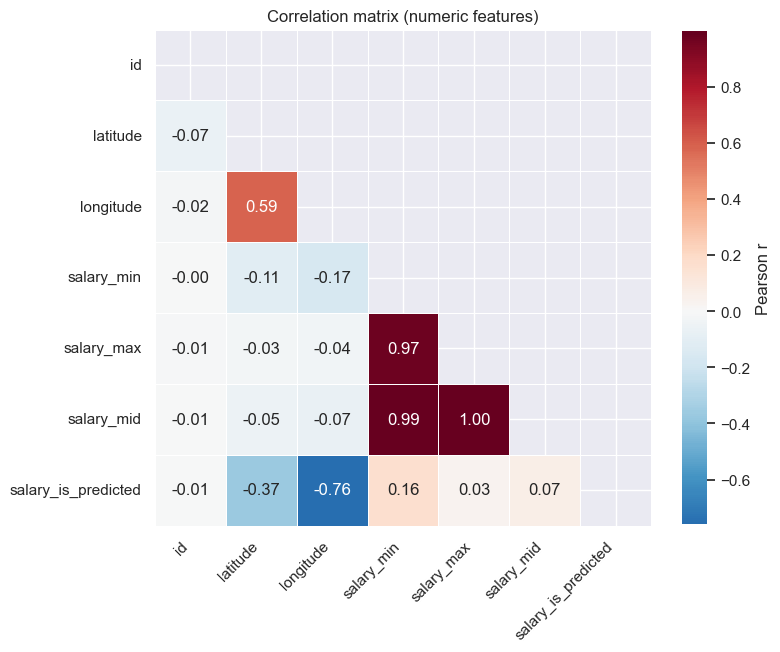

Saved heatmap to corr_matrix.png with 7 numeric features.


In [14]:
# Correlation matrix heatmap for numeric features
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
if len(num_cols) < 2:
    print("Not enough numeric columns to compute a correlation matrix.")
else:
    corr = df[num_cols].corr()

    # Dynamic figure size based on number of columns
    n = len(num_cols)
    size = max(8, min(0.55 * n + 4, 20))

    # Mask the upper triangle to reduce clutter
    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=(size, size))
    sns.heatmap(
        corr,
        mask=mask,
        cmap="RdBu_r",
        center=0,
        annot=(n <= 15),   # annotate only if manageable number of vars
        fmt=".2f",
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8, "label": "Pearson r"}
    )
    plt.title("Correlation matrix (numeric features)")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    # Using constrained layout via rcParams; avoid tight_layout to prevent layout-engine conflict with colorbar.

    # Save and display
    plt.savefig("corr_matrix.png", dpi=220, bbox_inches="tight")
    plt.show()

    print(f"Saved heatmap to corr_matrix.png with {n} numeric features.")

### Scatter plots

In [ ]:
# Pairwise x-y scatter matrices with regression lines (no duplicates)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
num_cols = df.select_dtypes(include=["number"]).columns.tolist()

if len(num_cols) < 2:
    print("Not enough numeric columns for a pairwise scatter matrix (need >= 2).")
else:
    # Limit number of variables for readability/performance (choose by variance)
    max_vars = 10  # adjust if you want more/less
    if len(num_cols) > max_vars:
        var_order = df[num_cols].var(numeric_only=True).sort_values(ascending=False)
        selected_cols = var_order.index[:max_vars].tolist()
        print(f"Selected top {max_vars} numeric columns by variance for plotting:\n{selected_cols}")
    else:
        selected_cols = num_cols

    # Optional row sampling for very large datasets
    max_rows = 5000
    if len(df) > max_rows:
        dplot = df[selected_cols].sample(max_rows, random_state=42)
        print(f"Sampled {max_rows} rows from {len(df)} for speed.")
    else:
        dplot = df[selected_cols]

    # Build pairplot with regression in lower triangle only (no duplicates)
    sns.set_theme()
    g = sns.pairplot(
        dplot,
        kind="reg",
        diag_kind="kde",
        corner=True,              # show only lower triangle (no duplicates)
        plot_kws={
            "scatter_kws": {"alpha": 0.35, "s": 16, "edgecolor": "none"},
            "line_kws": {"color": "crimson", "lw": 1.5},
            "ci": 95,
        },
        height=2.0,               # size of each subplot
        aspect=1.0,
    )

    # Tweak labels/spacing and save
    g.fig.suptitle(
        f"Pairwise scatter with regression (lower triangle) — {len(selected_cols)} vars",
        y=1.02,
        fontsize=13,
    )
    g.fig.tight_layout()
    g.fig.savefig("scatter_matrix_reg.png", dpi=220, bbox_inches="tight")
    plt.show()
    print("Saved scatterplot matrix to scatter_matrix_reg.png.")

### categorical count and propotion

,column,category,count,proportion_pct
0,title,INFIRMIER ANESTHÉSISTE DE (F/H),87,2.17
1,title,CONSEILLER PATRIMONIAL (MIA) (H/F),44,1.1
2,title,Conseiller patrimonial (MIA) (H/F),28,0.7
3,title,Conseiller(e) en gestion de patrimoine H/F,26,0.65
4,title,AUXILIAIRE DE PUÉRICULTURE (F/H),19,0.48
5,title,Sales Executive,16,0.4
6,title,Vrachtwagenchauffeur CE,14,0.35
7,title,Licensed Group Therapist (Residential),14,0.35
8,title,Guitar Technician (Luthier) Store 453,13,0.32
9,title,Psychiatrist,11,0.27


/var/folders/r9/d738n0z536z51tn7_3d0_bzc0000gn/T/ipykernel_83067/1994863351.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="category", data=data, ax=axes[i], palette="viridis")
/var/folders/r9/d738n0z536z51tn7_3d0_bzc0000gn/T/ipykernel_83067/1994863351.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="category", data=data, ax=axes[i], palette="viridis")
/var/folders/r9/d738n0z536z51tn7_3d0_bzc0000gn/T/ipykernel_83067/1994863351.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="category", d

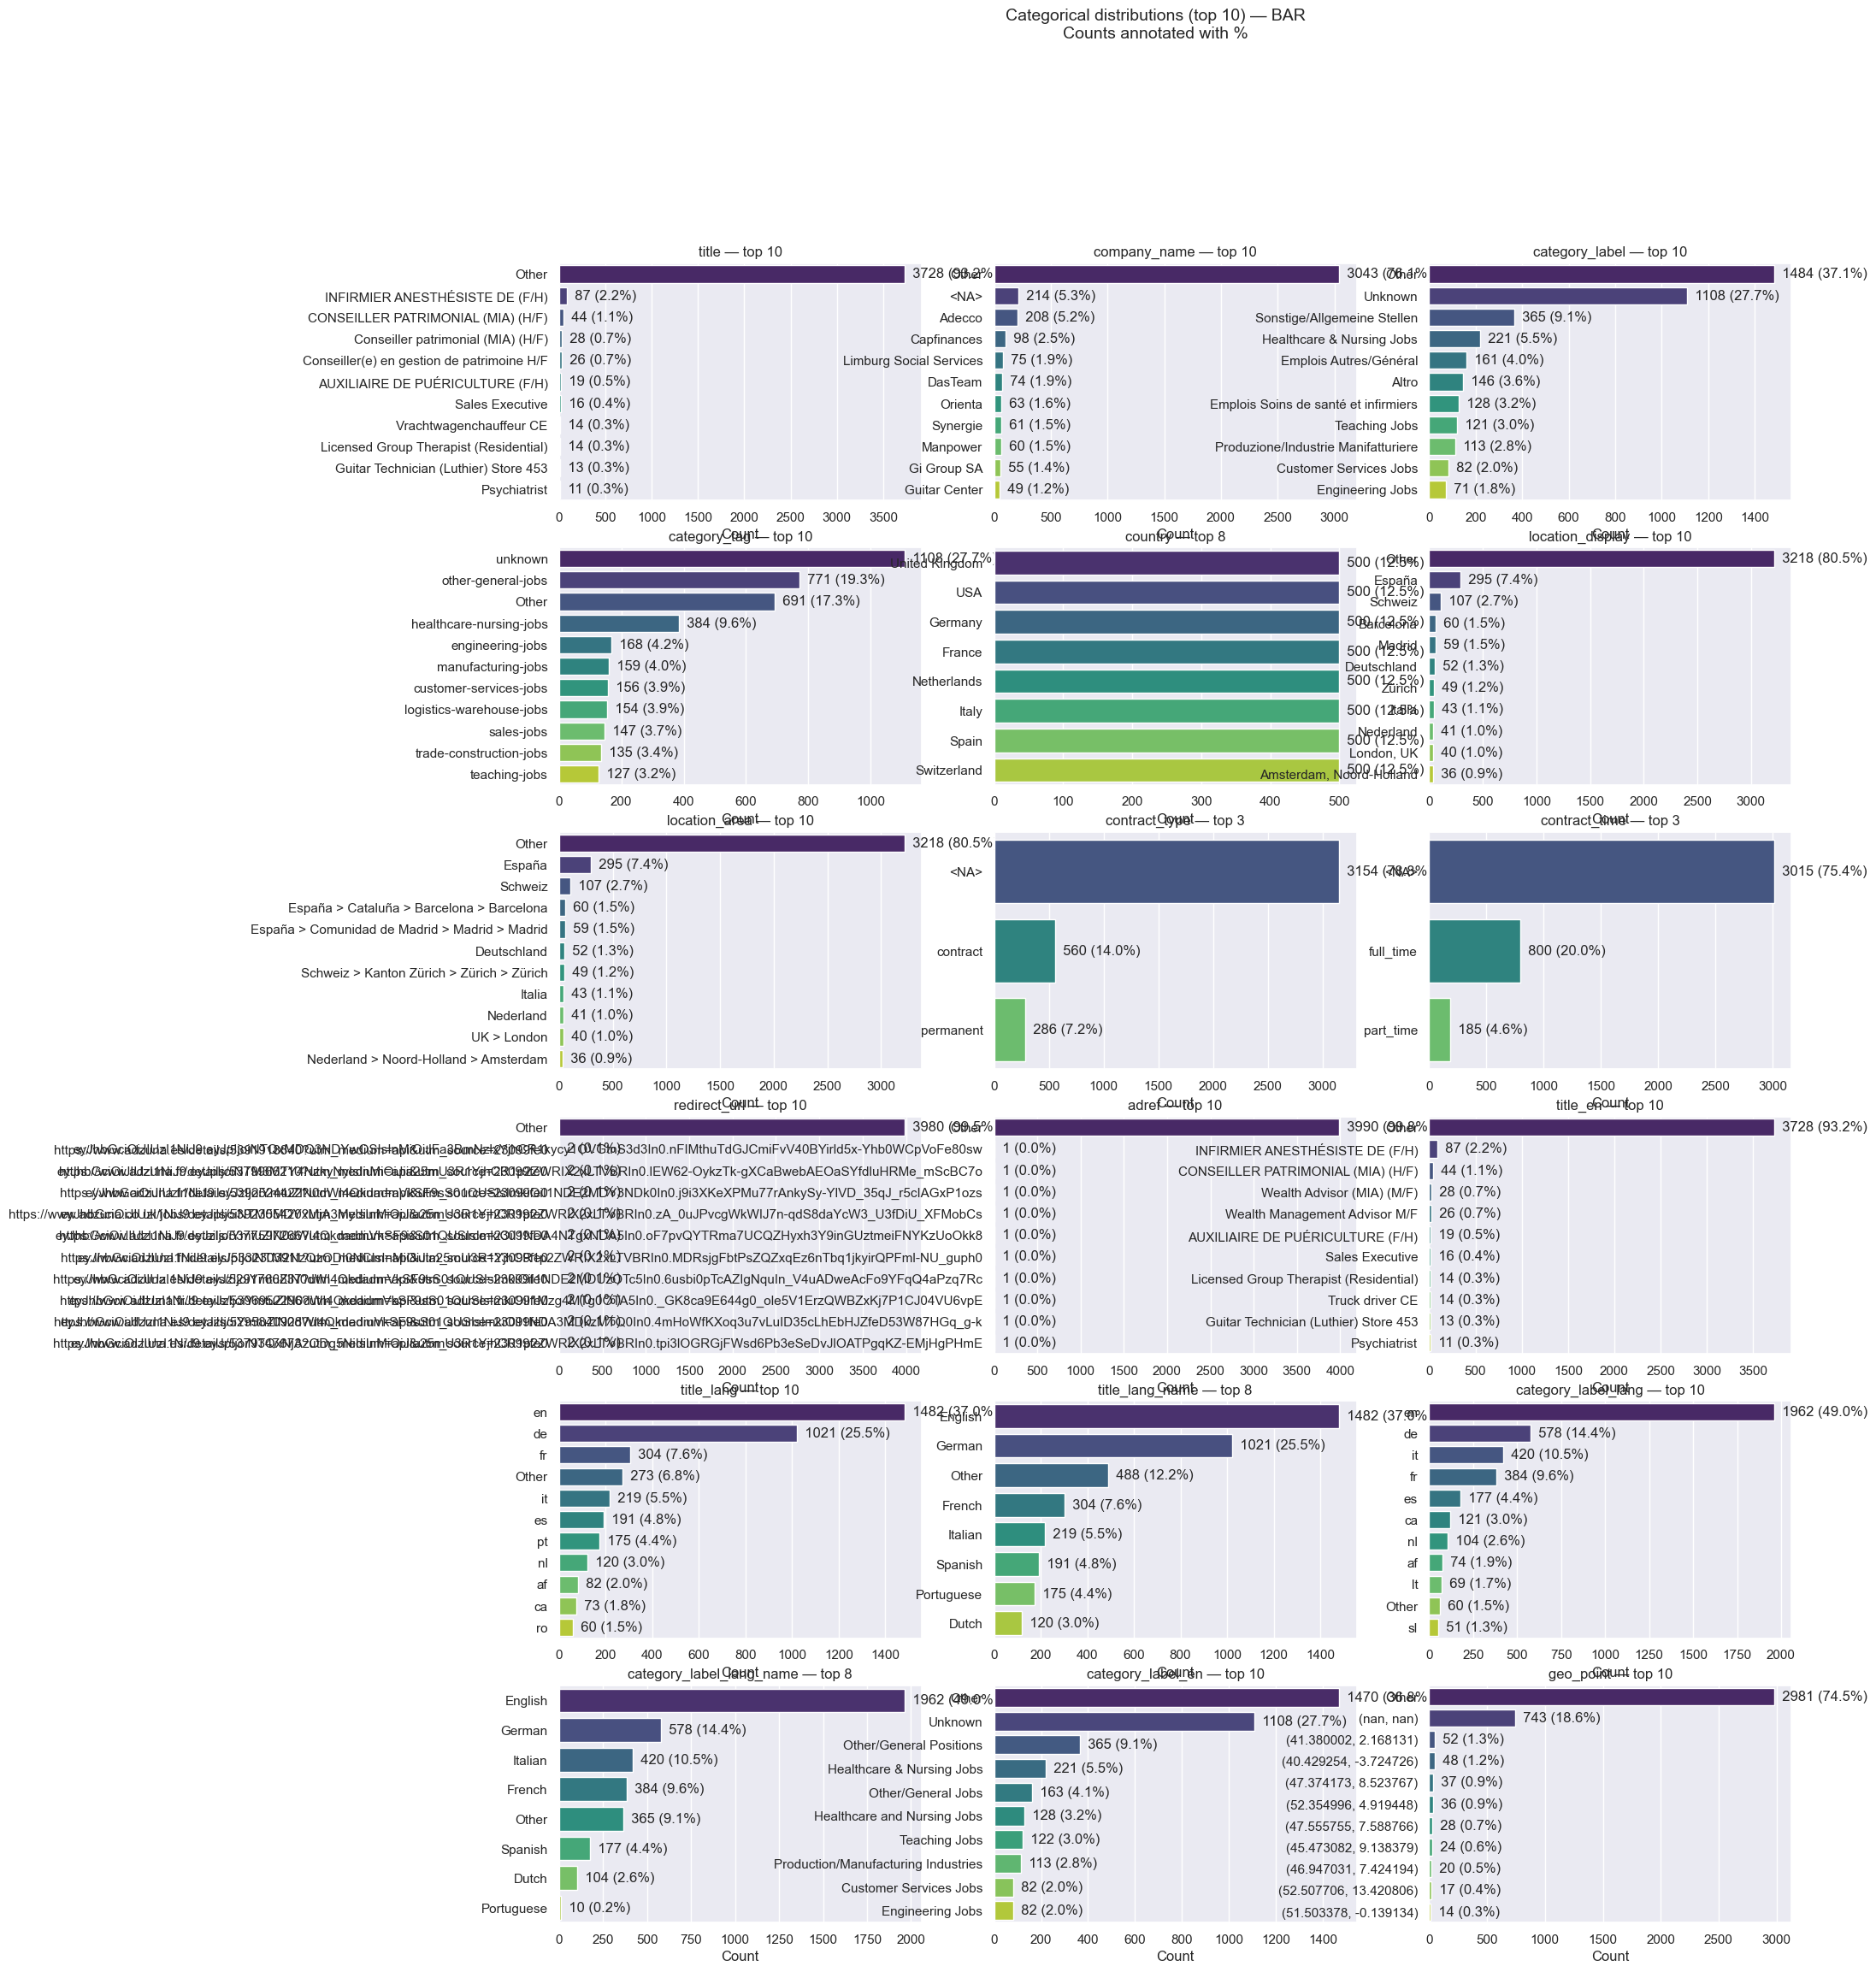

Saved figure to categorical_counts_proportions_bar.png for 18 categorical columns.


In [15]:
# Categorical counts and proportions + bar/pie visualization
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Config
viz_type = "bar"   # choose: "bar" or "pie"
top_n = 10          # show top N categories per column
include_other = True

# Identify categorical-like columns
cat_cols = df.select_dtypes(include=["category", "object", "bool"]).columns.tolist()
cat_cols = [c for c in cat_cols if df[c].notna().sum() > 0]

if not cat_cols:
    print("No categorical/object/bool columns found.")
else:
    # Build tidy summary table: column, category, count, proportion_pct
    def summarize_categoricals(frame, columns, top=10, add_other=True):
        parts = []
        for col in columns:
            s = frame[col].astype("string").fillna("<NA>")
            vc = s.value_counts(dropna=False)
            total = int(vc.sum())
            take = vc.head(top)
            if add_other and len(vc) > top:
                other_count = int(total - int(take.sum()))
                take.loc["Other"] = other_count
            part = pd.DataFrame({
                "column": col,
                "category": take.index,
                "count": take.values,
            })
            part["proportion_pct"] = (part["count"] / total * 100.0).round(2)
            parts.append(part)
        return pd.concat(parts, ignore_index=True)

    cat_summary = summarize_categoricals(df, cat_cols, top=top_n, add_other=include_other)
    display(cat_summary.head(30))

    # Plot grid
    n = len(cat_cols)
    cols = 3 if n >= 3 else n
    rows = math.ceil(n / cols)
    figsize = (cols * 6.2, rows * (4.2 if viz_type == "bar" else 4.8))
    fig, axes = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
    axes = axes.flatten() if n > 1 else [axes]

    for i, col in enumerate(cat_cols):
        data = cat_summary[cat_summary["column"] == col].copy()
        data = data.sort_values("count", ascending=False)

        if viz_type == "bar":
            sns.barplot(x="count", y="category", data=data, ax=axes[i], palette="viridis")
            axes[i].set_title(f"{col} — top {min(top_n, len(data))}")
            axes[i].set_xlabel("Count")
            axes[i].set_ylabel("")
            # annotate with percentage
            for p, pct in zip(axes[i].patches, data["proportion_pct"].values):
                width = p.get_width()
                y = p.get_y() + p.get_height() / 2
                axes[i].text(width, y, f"  {int(width)} ({pct:.1f}%)", va="center")
        else:  # pie
            counts = data["count"].values
            labels = data["category"].astype(str).values
            total = counts.sum()
            def autopct_fmt(p):
                count = int(round(p / 100.0 * total))
                return f"{p:.1f}%\n({count})"
            axes[i].pie(
                counts,
                labels=labels,
                autopct=autopct_fmt,
                startangle=140,
                textprops={"fontsize": 8},
                colors=sns.color_palette("viridis", n_colors=len(counts)),
            )
            axes[i].axis("equal")
            axes[i].set_title(f"{col} — top {min(top_n, len(data))}")

    # Hide unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    fig.suptitle(
        f"Categorical distributions (top {top_n}) — {viz_type.upper()}\nCounts annotated with %",
        fontsize=14,
    )

    out_name = f"categorical_counts_proportions_{viz_type}.png"
    fig.savefig(out_name, dpi=220, bbox_inches="tight")
    plt.show()
    print(f"Saved figure to {out_name} for {n} categorical columns.")

### add cols year, week

In [16]:
# Ensure datetime dtypes and add date parts (year, month, day, ISO week)
import pandas as pd

added_cols = []

# created_dt: treat as UTC timestamp if present
if 'created_dt' in df.columns:
    df['created_dt'] = pd.to_datetime(df['created_dt'], errors='coerce', utc=True)
    iso_dt = df['created_dt'].dt.isocalendar()
    df['created_dt_year'] = df['created_dt'].dt.year.astype('Int64')
    df['created_dt_month'] = df['created_dt'].dt.month.astype('Int64')
    df['created_dt_day'] = df['created_dt'].dt.day.astype('Int64')
    df['created_dt_iso_year'] = iso_dt['year'].astype('Int64')
    df['created_dt_iso_week'] = iso_dt['week'].astype('Int64')
    added_cols += ['created_dt_year','created_dt_month','created_dt_day','created_dt_iso_year','created_dt_iso_week']
else:
    print("Column 'created_dt' not found; skipping.")

# created_date: date-only (naive) if present
if 'created_date' in df.columns:
    df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')
    iso_d = df['created_date'].dt.isocalendar()
    df['created_date_year'] = df['created_date'].dt.year.astype('Int64')
    df['created_date_month'] = df['created_date'].dt.month.astype('Int64')
    df['created_date_day'] = df['created_date'].dt.day.astype('Int64')
    df['created_date_iso_year'] = iso_d['year'].astype('Int64')
    df['created_date_iso_week'] = iso_d['week'].astype('Int64')
    added_cols += ['created_date_year','created_date_month','created_date_day','created_date_iso_year','created_date_iso_week']
else:
    print("Column 'created_date' not found; skipping.")

if added_cols:
    print("Added/updated columns:", added_cols)
    display(df[added_cols].head())
else:
    print("No date parts added (date columns missing).")

Added/updated columns: ['created_dt_year', 'created_dt_month', 'created_dt_day', 'created_dt_iso_year', 'created_dt_iso_week', 'created_date_year', 'created_date_month', 'created_date_day', 'created_date_iso_year', 'created_date_iso_week']


,created_dt_year,created_dt_month,created_dt_day,created_dt_iso_year,created_dt_iso_week,created_date_year,created_date_month,created_date_day,created_date_iso_year,created_date_iso_week
0,2025,9,22,2025,39,2025,9,22,2025,39
1,2025,9,3,2025,36,2025,9,3,2025,36
2,2025,9,8,2025,37,2025,9,8,2025,37
3,2025,9,17,2025,38,2025,9,17,2025,38
4,2025,9,15,2025,38,2025,9,15,2025,38


### category variables to text and NLP cleaning

In [17]:
# NLP prep: convert category_* to text, clean, and tokenize
import re
import pandas as pd

# NLTK imports and resource setup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure required NLTK resources are available
for pkg, path in [("punkt", "tokenizers/punkt"), ("stopwords", "corpora/stopwords")]:
    try:
        nltk.data.find(path)
    except LookupError:
        nltk.download(pkg, quiet=True)
# Optional: newer NLTK sometimes needs punkt_tab
try:
    nltk.data.find("tokenizers/punkt_tab")
except Exception:
    try:
        nltk.download("punkt_tab", quiet=True)
    except Exception:
        pass

# Identify the two (or more) category_* columns
cat_like_cols = [c for c in df.columns if c.startswith("category_label_en")]
if not cat_like_cols:
    print("No columns starting with 'category_'.")
else:
    # Convert to string dtype (preserve NaN)
    for col in cat_like_cols:
        if str(df[col].dtype) == 'category':
            df[col] = df[col].astype('string')
        else:
            df[col] = df[col].astype('string')

    # Build stopword set and include domain-specific removals
    sw = set(stopwords.words('english'))
    sw.update({"job", "jobs"})  # remove job(s)

    def clean_and_tokenize(text: pd.Series | str):
        if pd.isna(text):
            return "", []
        s = str(text).lower()
        # Remove special characters, punctuation, numbers: keep letters and whitespace only
        s = re.sub(r"[^a-z\s]", " ", s)
        # Normalize whitespace
        s = re.sub(r"\s+", " ", s).strip()
        if not s:
            return "", []
        # Tokenize and remove stopwords
        toks = [t for t in word_tokenize(s) if t and t not in sw]
        # Final normalized text and tokens
        cleaned = " ".join(toks)
        return cleaned, toks

    new_cols = []
    for col in cat_like_cols:
        clean_col = f"{col}_clean"
        tok_col = f"{col}_tokens"
        cleaned_tokens = df[col].apply(clean_and_tokenize)
        df[clean_col] = cleaned_tokens.apply(lambda x: x[0]).astype('string')
        df[tok_col] = cleaned_tokens.apply(lambda x: x[1])
        new_cols.extend([clean_col, tok_col])

    print("Created cleaned text and tokens for:", cat_like_cols)
    display(df[cat_like_cols + new_cols].head(10))

Created cleaned text and tokens for: ['category_label_en']


,category_label_en,category_label_en_clean,category_label_en_tokens
0,Trade & Construction Jobs,trade construction,"[trade, construction]"
1,Graduate Jobs,graduate,[graduate]
2,Domestic help & Cleaning Jobs,domestic help cleaning,"[domestic, help, cleaning]"
3,Teaching Jobs,teaching,[teaching]
4,IT Jobs,,[]
5,Scientific & QA Jobs,scientific qa,"[scientific, qa]"
6,IT Jobs,,[]
7,Customer Services Jobs,customer services,"[customer, services]"
8,Teaching Jobs,teaching,[teaching]
9,Logistics & Warehouse Jobs,logistics warehouse,"[logistics, warehouse]"


### data engineeering feature new category column

In [18]:
# Combine category_* columns into unique-word features
import re
import pandas as pd

# Detect category-like columns
cat_like_cols = [c for c in df.columns if c.startswith('category_') and not c.endswith('_tokens') and not c.endswith('_clean')]
if len(cat_like_cols) < 1:
    print("No base 'category_' columns found.")
elif len(cat_like_cols) == 1:
    base_cols = cat_like_cols
    print(f"Only one category column found: {base_cols}. Will combine tokens from it alone.")
else:
    # Take the first two by sorted order for reproducibility
    base_cols = sorted(cat_like_cols)[:2]
    print(f"Combining category columns: {base_cols}")

# Helper: get tokens for a column, prefer precomputed '<col>_tokens'
def get_tokens_for(col: str):
    tok_col = f"{col}_tokens"
    if tok_col in df.columns:
        return df[tok_col]
    # Fallback: quick lightweight clean + split (lowercase, letters+space only)
    def quick_tokenize(x):
        if pd.isna(x):
            return []
        s = str(x).lower()
        s = re.sub(r"[^a-z\s]", " ", s)
        s = re.sub(r"\s+", " ", s).strip()
        return [] if not s else s.split()
    return df[col].apply(quick_tokenize)

# Build combined unique-order tokens
if cat_like_cols:
    series_list = [get_tokens_for(c) for c in base_cols]

    def unique_merge(*token_lists):
        seen = set()
        merged = []
        for tokens in token_lists:
            for t in tokens:
                if t and (t not in seen):
                    seen.add(t)
                    merged.append(t)
        return merged

    combined_tokens = [unique_merge(*row) for row in zip(*series_list)] if len(series_list) >= 1 else []
    df['category_combined_tokens'] = combined_tokens
    df['category_combined_clean'] = pd.Series(combined_tokens).apply(lambda ts: " ".join(ts) if ts else pd.NA).astype('string')

    # Optional: also combine original raw strings then de-duplicate words
    def raw_words_for(col):
        if df[col].dtype.name == 'category':
            s = df[col].astype('string')
        else:
            s = df[col].astype('string')
        return s.fillna("")

    try:
        raw_join = (raw_words_for(base_cols[0]) + ' ' + (raw_words_for(base_cols[1]) if len(base_cols) > 1 else ''))
        raw_join = raw_join.str.lower().str.replace(r"[^a-z\s]", " ", regex=True).str.replace(r"\s+", " ", regex=True).str.strip()
        def dedup_words(s):
            if not isinstance(s, str) or not s:
                return pd.NA
            seen = set()
            out = []
            for w in s.split(' '):
                if w and (w not in seen):
                    seen.add(w)
                    out.append(w)
            return " ".join(out) if out else pd.NA
        df['category_combined_raw_dedup'] = raw_join.apply(dedup_words).astype('string')
    except Exception:
        pass

    print("Created 'category_combined_tokens' and 'category_combined_clean'. Preview:")
    preview_cols = base_cols + ['category_combined_clean']
    if 'category_combined_raw_dedup' in df.columns:
        preview_cols.append('category_combined_raw_dedup')
    display(df[preview_cols].head(10))
else:
    print("No category columns to combine.")

Combining category columns: ['category_label', 'category_label_en']


TypeError: unhashable type: 'list'

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          4000 non-null   int64              
 1   title                       4000 non-null   object             
 2   company_name                3786 non-null   category           
 3   category_label              4000 non-null   category           
 4   category_tag                4000 non-null   category           
 5   country                     4000 non-null   category           
 6   location_display            4000 non-null   object             
 7   location_area               4000 non-null   object             
 8   latitude                    3257 non-null   float64            
 9   longitude                   3257 non-null   float64            
 10  contract_type               846 non-null    category        

## update df for Global Jobs Analysis

In [20]:
# Create clean category label and cast to categorical dtype
import re
import pandas as pd

# Choose best available clean text as a unified label
candidates = []
if 'category_combined_clean' in df.columns:
    candidates.append('category_combined_clean')
if 'category_label_clean' in df.columns:
    candidates.append('category_label_clean')
if 'category_tag_clean' in df.columns:
    candidates.append('category_tag_clean')
# Fall back to raw if needed
if 'category_label' in df.columns:
    candidates.append('category_label')
elif 'category_tag' in df.columns:
    candidates.append('category_tag')

if not candidates:
    print("No category label sources found to create 'category_labels_clean'.")
else:
    # Build the unified clean label by taking first non-null among candidates
    def first_non_null(row):
        for col in candidates:
            val = row.get(col, pd.NA)
            if pd.notna(val) and str(val).strip() != '':
                return val
        return pd.NA

    # If raw chosen, normalize it to lower/letters+space
    def normalize_if_raw(val):
        if pd.isna(val):
            return pd.NA
        s = str(val)
        # If already looks normalized (lowercase and space-separated), keep
        if s == s.lower() and re.fullmatch(r"[a-z\s]*", s or ""):
            return s if s else pd.NA
        s = s.lower()
        s = re.sub(r"[^a-z\s]", " ", s)
        s = re.sub(r"\s+", " ", s).strip()
        return s if s else pd.NA

    tmp = df[candidates].copy()
    chosen = tmp.apply(first_non_null, axis=1)
    df['category_labels_clean'] = chosen.apply(normalize_if_raw).astype('string')

    # Cast relevant cleaned columns to categorical dtype
    to_cast = ['category_labels_clean']
    for col in ['category_label_clean','category_tag_clean','category_combined_clean']:
        if col in df.columns:
            to_cast.append(col)
    for col in to_cast:
        df[col] = df[col].astype('category')

    # Preview
    preview_cols = []
    for col in ['category_label','category_tag','category_label_clean','category_tag_clean','category_combined_clean','category_labels_clean']:
        if col in df.columns:
            preview_cols.append(col)
    print("Created 'category_labels_clean' and cast cleaned columns to category dtype. Preview:")
    display(df[preview_cols].head(10))
    print("\nDtype check for cleaned columns:")
    print(df[[c for c in to_cast if c in df.columns]].dtypes)

Created 'category_labels_clean' and cast cleaned columns to category dtype. Preview:


,category_label,category_tag,category_labels_clean
0,Trade & Construction Jobs,trade-construction-jobs,trade construction jobs
1,Graduate Jobs,graduate-jobs,graduate jobs
2,Domestic help & Cleaning Jobs,domestic-help-cleaning-jobs,domestic help cleaning jobs
3,Teaching Jobs,teaching-jobs,teaching jobs
4,IT Jobs,it-jobs,it jobs
5,Scientific & QA Jobs,scientific-qa-jobs,scientific qa jobs
6,IT Jobs,it-jobs,it jobs
7,Customer Services Jobs,customer-services-jobs,customer services jobs
8,Teaching Jobs,teaching-jobs,teaching jobs
9,Logistics & Warehouse Jobs,logistics-warehouse-jobs,logistics warehouse jobs



Dtype check for cleaned columns:
category_labels_clean    category
dtype: object


### Now text and NLP clean for contract_

In [21]:
# NLP cleaning for contract_* columns: lowercase, remove specials/punct/numbers, remove stopwords, normalize spaces, tokenize
import re
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure required NLTK resources
for pkg, path in [("punkt", "tokenizers/punkt"), ("stopwords", "corpora/stopwords")]:
    try:
        nltk.data.find(path)
    except LookupError:
        nltk.download(pkg, quiet=True)

# Detect contract_* columns
contract_cols = [c for c in df.columns if c.startswith('contract_')]
if not contract_cols:
    print("No columns starting with 'contract_'.")
else:
    # Ensure string dtype
    for col in contract_cols:
        if str(df[col].dtype) == 'category':
            df[col] = df[col].astype('string')
        else:
            df[col] = df[col].astype('string')

    # Build stopword set (reuse global 'sw' if available to keep consistency)
    sw = set(globals().get('sw', set(stopwords.words('english'))))
    # Domain-specific removals for contract fields
    sw.update({"contract", "contracts"})

    # Cleaning function
    def clean_and_tokenize_contract(x):
        if pd.isna(x):
            return pd.NA, []
        s = str(x).lower()
        # Remove special characters and punctuation explicitly mentioned
        s = re.sub(r"[!@#$%^&*()_+=<>?/\-]", " ", s)
        # Remove any remaining non-letters (keep spaces)
        s = re.sub(r"[^a-z\s]", " ", s)
        # Normalize whitespace
        s = re.sub(r"\s+", " ", s).strip()
        if not s:
            return pd.NA, []
        toks = [t for t in word_tokenize(s) if t and t not in sw]
        cleaned = " ".join(toks) if toks else pd.NA
        return cleaned, toks

    new_cols = []
    for col in contract_cols:
        clean_col = f"{col}_clean"
        tok_col = f"{col}_tokens"
        cleaned_tokens = df[col].apply(clean_and_tokenize_contract)
        df[clean_col] = cleaned_tokens.apply(lambda x: x[0]).astype('string')
        df[tok_col] = cleaned_tokens.apply(lambda x: x[1])
        new_cols.extend([clean_col, tok_col])

    # Cast cleaned text to category dtype if desired for memory/analysis
    for col in [c for c in new_cols if c.endswith('_clean')]:
        df[col] = df[col].astype('category')

    print("Created cleaned and tokenized columns for:", contract_cols)
    preview_cols = []
    for base in contract_cols:
        preview_cols.extend([base, f"{base}_clean", f"{base}_tokens"])    
    display(df[preview_cols].head(10))

Created cleaned and tokenized columns for: ['contract_type', 'contract_time']


,contract_type,contract_type_clean,contract_type_tokens,contract_time,contract_time_clean,contract_time_tokens
0,permanent,permanent,[permanent],full_time,full time,"[full, time]"
1,permanent,permanent,[permanent],full_time,full time,"[full, time]"
2,permanent,permanent,[permanent],part_time,part time,"[part, time]"
3,permanent,permanent,[permanent],full_time,full time,"[full, time]"
4,permanent,permanent,[permanent],full_time,full time,"[full, time]"
5,permanent,permanent,[permanent],full_time,full time,"[full, time]"
6,permanent,permanent,[permanent],full_time,full time,"[full, time]"
7,permanent,permanent,[permanent],full_time,full time,"[full, time]"
8,contract,<NA>,[],full_time,full time,"[full, time]"
9,permanent,permanent,[permanent],full_time,full time,"[full, time]"


### Combine contract_ new column to reduce missing

In [22]:
# Build 'contract_info_combined' from available contract_*_clean columns with de-duplicated words (order-preserving)

# 1) Identify cleaned contract columns (prefer a stable, intuitive order)
pref_order = ['contract_type_clean', 'contract_time_clean', 'contract_info_clean']
available_clean = [c for c in pref_order if c in df.columns]
# include any other contract_*_clean columns not in pref list
available_clean += [
    c for c in df.columns
    if c.startswith('contract_') and c.endswith('_clean') and c not in available_clean
]

if not available_clean:
    print("No 'contract_*_clean' columns found; cannot create 'contract_info_combined'.")
else:
    def _combine_contract_clean(row):
        seen = set()
        tokens = []
        for col in available_clean:
            val = row[col]
            if pd.isna(val):
                continue
            s = str(val).strip()
            if not s:
                continue
            for t in s.split():
                if t and t not in seen:
                    seen.add(t)
                    tokens.append(t)
        return " ".join(tokens) if tokens else pd.NA

    df['contract_info_combined'] = df[available_clean].apply(_combine_contract_clean, axis=1).astype('string')
    print("Created 'contract_info_combined' from:", available_clean)
    display(df[available_clean + ['contract_info_combined']].head(10))

Created 'contract_info_combined' from: ['contract_type_clean', 'contract_time_clean']


,contract_type_clean,contract_time_clean,contract_info_combined
0,permanent,full time,permanent full time
1,permanent,full time,permanent full time
2,permanent,part time,permanent part time
3,permanent,full time,permanent full time
4,permanent,full time,permanent full time
5,permanent,full time,permanent full time
6,permanent,full time,permanent full time
7,permanent,full time,permanent full time
8,<NA>,full time,full time
9,permanent,full time,permanent full time


### Impute unknown for missing in contract_info * not as useful for test data but don't want to lose category and rows when removing missing. Won't use for ML modeling.

In [ ]:
# Impute missing contract_info with 'unknown' and create 'contract_info_clean'
if 'contract_info' in df.columns:
    s = df['contract_info']
    missing_before = int(s.isna().sum())

    if missing_before > 0:
        if s.dtype.name == 'category':
            if 'unknown' not in s.cat.categories:
                s = s.cat.add_categories(['unknown'])
            s = s.fillna('unknown')
        else:
            s = s.astype('string').fillna('unknown')
        df['contract_info'] = s
        print(f"Imputed 'contract_info' NaNs -> 'unknown' (before: {missing_before}, after: {int(df['contract_info'].isna().sum())}).")
    else:
        print("No missing in 'contract_info'; no imputation applied.")

    # Create clean column mirroring current contract_info
    df['contract_info_clean'] = df['contract_info'].astype('string').fillna('unknown').astype('category')
    print("Created 'contract_info_clean'.")
else:
    print("Column 'contract_info' not found; skipped imputation and clean column.")

# 1) contract_info in df
if 'contract_info' in df.columns:
    s = df['contract_info']
    # Ensure category has 'unknown' then fill
    if s.dtype.name == 'category':
        if 'unknown' not in s.cat.categories:
            s = s.cat.add_categories(['unknown'])
        s = s.fillna('unknown')
    else:
        s = s.astype('string').fillna('unknown')
    df['contract_info'] = s
    print("Imputed df['contract_info'] missing -> 'unknown'.")
    print('After fill — missing count:', int(df['contract_info'].isna().sum()))
else:
    print("Column 'contract_info' not found in df; nothing to impute.")

# 2) Keep contract_info_combined consistent (string)
if 'contract_info' in df.columns:
    df['contract_info'] = df['contract_info'].astype('string').fillna('unknown')
    print("Aligned df['contract_info'] missing -> 'unknown'.")

# 3) If df_clean exists, align same fields there too
try:
    _ = df_clean
    if 'contract_info' in df_clean.columns:
        s2 = df_clean['contract_info']
        if s2.dtype.name == 'category':
            if 'unknown' not in s2.cat.categories:
                s2 = s2.cat.add_categories(['unknown'])
            s2 = s2.fillna('unknown')
        else:
            s2 = s2.astype('string').fillna('unknown')
        df_clean['contract_info'] = s2
    if 'contract_info_combined' in df_clean.columns:
        df_clean['contract_info_combined'] = df_clean['contract_info_combined'].astype('string').fillna('unknown')
    print("Imputed missing contract info fields in df_clean where present.")
except NameError:
    pass

# Quick preview
cols = [c for c in ['contract_info','contract_info_combined'] if c in df.columns]
if cols:
    display(df[cols].head(10))

In [23]:
df.head()

,id,title,company_name,category_label,category_tag,country,location_display,location_area,latitude,longitude,...,created_date_iso_year,created_date_iso_week,category_label_en_clean,category_label_en_tokens,category_labels_clean,contract_type_clean,contract_type_tokens,contract_time_clean,contract_time_tokens,contract_info_combined
0,5410474609,Mechanical Pipefitter,Dodd Group,Trade & Construction Jobs,trade-construction-jobs,United Kingdom,"King's Lynn, Norfolk",UK > Eastern England > Norfolk > King's Lynn,52.751999,0.395357,...,2025,39,trade construction,"[trade, construction]",trade construction jobs,permanent,[permanent],full time,"[full, time]",permanent full time
1,5381519011,International Trade Policy Editor [Startup Pol...,Applio Ventures,Graduate Jobs,graduate-jobs,United Kingdom,"London, UK",UK > London,NaN,NaN,...,2025,36,graduate,[graduate],graduate jobs,permanent,[permanent],full time,"[full, time]",permanent full time
2,5389371380,Domestic Cleaner,Maid2Clean Suffolk Ltd,Domestic help & Cleaning Jobs,domestic-help-cleaning-jobs,United Kingdom,"Diss, Norfolk",UK > Eastern England > Norfolk > Diss,52.377602,1.106380,...,2025,37,domestic help cleaning,"[domestic, help, cleaning]",domestic help cleaning jobs,permanent,[permanent],part time,"[part, time]",permanent part time
3,5403097985,Early Years BABY Room Leader,Jesters Childcare Essex,Teaching Jobs,teaching-jobs,United Kingdom,UK,UK,NaN,NaN,...,2025,38,teaching,[teaching],teaching jobs,permanent,[permanent],full time,"[full, time]",permanent full time
4,5400306117,Senior Back-End Engineer,Eligible Limited,IT Jobs,it-jobs,United Kingdom,UK,UK,NaN,NaN,...,2025,38,,[],it jobs,permanent,[permanent],full time,"[full, time]",permanent full time


In [24]:
# Fresh missing-data overview for all columns
total_rows = len(df)
missing_counts = df.isna().sum()
missing_pct = (missing_counts / total_rows * 100).round(2)
non_missing = total_rows - missing_counts
dtypes = df.dtypes.astype(str)

missing_overview = (
    pd.DataFrame({
        "dtype": dtypes,
        "non_missing": non_missing,
        "missing": missing_counts,
        "missing_pct": missing_pct,
    })
    .sort_values("missing_pct", ascending=False)
)

# Summary printout
n_cols = df.shape[1]
n_missing_any = int((missing_counts > 0).sum())
n_missing_all = int((missing_counts == total_rows).sum())
print(f"Columns: {n_cols} | With any missing: {n_missing_any} | Fully missing: {n_missing_all}")
print(f"Rows: {total_rows}")

# Show top entries by missing percentage and a clean table of non-zero missing
display(missing_overview.head(20))
display(missing_overview[missing_overview["missing"] > 0])

# Optional: quickly view columns with no missing
# display(missing_overview[missing_overview["missing"] == 0])

Columns: 47 | With any missing: 11 | Fully missing: 0
Rows: 4000


,dtype,non_missing,missing,missing_pct
contract_type_clean,category,286,3714,92.85
contract_type,string,846,3154,78.85
contract_time,string,985,3015,75.38
contract_time_clean,category,985,3015,75.38
contract_info_combined,string,1033,2967,74.18
salary_max,float64,1535,2465,61.62
salary_min,float64,1544,2456,61.40
salary_mid,float64,1544,2456,61.40
latitude,float64,3257,743,18.58
longitude,float64,3257,743,18.58


,dtype,non_missing,missing,missing_pct
contract_type_clean,category,286,3714,92.85
contract_type,string,846,3154,78.85
contract_time,string,985,3015,75.38
contract_time_clean,category,985,3015,75.38
contract_info_combined,string,1033,2967,74.18
salary_max,float64,1535,2465,61.62
salary_min,float64,1544,2456,61.40
salary_mid,float64,1544,2456,61.40
latitude,float64,3257,743,18.58
longitude,float64,3257,743,18.58


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          4000 non-null   int64              
 1   title                       4000 non-null   object             
 2   company_name                3786 non-null   category           
 3   category_label              4000 non-null   category           
 4   category_tag                4000 non-null   category           
 5   country                     4000 non-null   category           
 6   location_display            4000 non-null   object             
 7   location_area               4000 non-null   object             
 8   latitude                    3257 non-null   float64            
 9   longitude                   3257 non-null   float64            
 10  contract_type               846 non-null    string          

### Engineer average salary based on min, mid, and maxaverage of all salary grouped by new category

In [26]:
# Create avg_salary:
# - If any of [salary_min, salary_mid, salary_max] are present, use their row-wise mean.
# - If all missing, impute from category averages with fallbacks (exact -> similar).
#   Averages are computed using non-predicted rows where available.

sal_cols = ['salary_min', 'salary_mid', 'salary_max']
for c in sal_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# 1) Row-wise mean using available values
row_avg = df[sal_cols].mean(axis=1, skipna=True)

# Use only non-predicted rows when computing group means (if column exists)
sip = df.get('salary_is_predicted', 0)
valid_for_group = row_avg.notna() & (sip == 0)

def group_means(keys_col: str):
    if keys_col not in df.columns:
        return None
    return row_avg[valid_for_group].groupby(df[keys_col][valid_for_group]).mean()

avg_salary = row_avg.copy()

# 2) Impute missing from category-based means (exact -> similar)
#    Order: combined clean -> unified clean label -> raw clean -> English clean -> raw dedup
fill_keys = [
    'category_combined_clean',
    'category_labels_clean',
    'category_label_clean',
    'category_label_en_clean',
    'category_combined_raw_dedup',
]

for key in fill_keys:
    gm = group_means(key)
    if gm is None:
        continue
    need = avg_salary.isna()
    if need.any():
        avg_salary.loc[need] = df.loc[need, key].map(gm)

# 3) Global fallback
global_mean = row_avg[valid_for_group].mean()
avg_salary = avg_salary.fillna(global_mean)

df['avg_salary'] = avg_salary.astype('float64')

print(
    f"avg_salary created. From row values: {int(row_avg.notna().sum())} | "
    f"Imputed: {int(df['avg_salary'].notna().sum() - row_avg.notna().sum())} | "
    f"Remaining NA: {int(df['avg_salary'].isna().sum())}"
)


avg_salary created. From row values: 1544 | Imputed: 2456 | Remaining NA: 0


/var/folders/r9/d738n0z536z51tn7_3d0_bzc0000gn/T/ipykernel_83067/34107034.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return row_avg[valid_for_group].groupby(df[keys_col][valid_for_group]).mean()


In [ ]:
# Clean and tokenize job titles -> create 'title_clean' and 'title_tokens'

# Choose source column: prefer translated title if available
src_col = 'title_en' if 'title_en' in df.columns else 'title'
if src_col not in df.columns:
    raise KeyError("Neither 'title_en' nor 'title' found in df.")

# Stopwords: reuse global 'sw' if defined; otherwise build a local set
try:
    _sw = set(sw)
except NameError:
    _sw = set(stopwords.words('english'))
# Domain-specific removals
_sw.update({"job", "jobs"})

def _clean_tokenize_title(x):
    if pd.isna(x):
        return pd.NA, []
    s = str(x).lower()
    # Remove punctuation, digits, and special chars; keep letters and spaces
    s = re.sub(r"[^a-z\s]", " ", s)
    # Normalize whitespace
    s = re.sub(r"\s+", " ", s).strip()
    if not s:
        return pd.NA, []
    # Tokenize and remove stopwords (fallback to simple split if NLTK fails)
    try:
        toks = [t for t in word_tokenize(s) if t and t not in _sw]
    except Exception:
        toks = [t for t in s.split() if t and t not in _sw]
    cleaned = " ".join(toks) if toks else pd.NA
    return cleaned, toks

_res = df[src_col].astype('string').apply(_clean_tokenize_title)
df['title_clean'] = _res.apply(lambda xy: xy[0]).astype('string')
df['title_tokens'] = _res.apply(lambda xy: xy[1])

print(f"Created 'title_clean' and 'title_tokens' from '{src_col}'. Preview:")
display(df[[c for c in [src_col, 'title_clean', 'title_tokens'] if c in df.columns]].head(10))

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          4000 non-null   int64              
 1   title                       4000 non-null   object             
 2   company_name                3786 non-null   category           
 3   category_label              4000 non-null   category           
 4   category_tag                4000 non-null   category           
 5   country                     4000 non-null   category           
 6   location_display            4000 non-null   object             
 7   location_area               4000 non-null   object             
 8   latitude                    3257 non-null   float64            
 9   longitude                   3257 non-null   float64            
 10  contract_type               846 non-null    string          

## review all new columns for clean save and add below

## New clean dataframe

In [40]:
# Build df_clean2 with selected columns for downstream analysis
import pandas as pd

# Ensure supporting fields exist or compute them
# 1) avg_salary: if existing, use; else compute from min/max if available
if 'avg_salary' not in df.columns:
    min_cols = [c for c in df.columns if c.lower() in ('avg_salary_min','salary_min','min_salary','salary_low')]
    max_cols = [c for c in df.columns if c.lower() in ('avg_salary_max','salary_max','max_salary','salary_high')]
    if min_cols and max_cols:
        min_col = min_cols[0]
        max_col = max_cols[0]
        df['avg_salary'] = pd.to_numeric(df[min_col], errors='coerce').add(pd.to_numeric(df[max_col], errors='coerce')).div(2)
    else:
        # placeholder if no inputs; column will be NA
        df['avg_salary'] = pd.NA

# 2) geo_point: ensure it exists as a tuple; attempt to construct if missing
if 'geo_point' not in df.columns:
    lat_cand = None
    lon_cand = None
    for c in df.columns:
        cl = c.lower()
        if lat_cand is None and ('latitude' in cl or cl == 'lat'):
            lat_cand = c
        if lon_cand is None and ('longitude' in cl or cl == 'lon' or cl == 'lng'):
            lon_cand = c
    if lat_cand and lon_cand:
        df['geo_point'] = list(zip(pd.to_numeric(df[lat_cand], errors='coerce'), pd.to_numeric(df[lon_cand], errors='coerce')))
    else:
        df['geo_point'] = pd.NA

# 3) company_name fallback: in case dataset uses another field name
company_col = 'company_name'
if 'company_name' not in df.columns:
    for alt in ['company', 'employer_name', 'organization']:
        if alt in df.columns:
            company_col = alt
            break

# Requested columns and order
requested_cols = [
    'id',
    'title_en',
    company_col,                 # company_name or fallback
    'country',
    'location_area',
    'geo_point',
    'created_date_year',
    'created_date_month',
    'created_date_day',
    'created_date_iso_year',
    'created_date_iso_week',
    'created_dt_year',
    'created_dt_month',
    'created_dt_day',
    'created_dt_iso_year',
    'created_dt_iso_week',
    'title_clean',
    'title_tokens',
    'category_labels_clean',
    'created_date_month',
    'created_date_day',
    'created_date_iso_year',
    'created_date_iso_week',
    'category_label_en',
    'avg_salary',
    'contract_info'
    'contract_info_combined',
]

# Validate presence and create df_clean
present = [c for c in requested_cols if c in df.columns]
missing = [c for c in requested_cols if c not in df.columns]
if company_col != 'company_name' and 'company_name' in missing and company_col in present:
    # rename for output
    df_tmp = df[present].rename(columns={company_col: 'company_name'})
    present = [c if c != company_col else 'company_name' for c in present]
else:
    df_tmp = df[present]

if missing:
    print("Warning: Missing columns not included in df_clean2:", missing)

# Reorder to requested order (for those present), and create df_clean
order = [c for c in requested_cols if c in df_tmp.columns]
df_clean2 = df_tmp[order].copy()

print(f"df_clean2 created: shape {df_clean2.shape}")
display(df_clean2.head(10))
print("\nInfo:")
print(df_clean2.dtypes)

df_clean2 created: shape (4000, 31)


,id,title_en,company_name,country,location_area,geo_point,created_date_year,created_date_month,created_date_month,created_date_day,...,created_date_month,created_date_month,created_date_day,created_date_day,created_date_iso_year,created_date_iso_year,created_date_iso_week,created_date_iso_week,category_label_en,avg_salary
0,5410474609,Mechanical Pipefitter,Dodd Group,United Kingdom,UK > Eastern England > Norfolk > King's Lynn,"(52.751999, 0.395357)",2025,9,9,22,...,9,9,22,22,2025,2025,39,39,Trade & Construction Jobs,40518.74
1,5381519011,International Trade Policy Editor [Startup Pol...,Applio Ventures,United Kingdom,UK > London,"(nan, nan)",2025,9,9,3,...,9,9,3,3,2025,2025,36,36,Graduate Jobs,64000.00
2,5389371380,Domestic Cleaner,Maid2Clean Suffolk Ltd,United Kingdom,UK > Eastern England > Norfolk > Diss,"(52.377602, 1.10638)",2025,9,9,8,...,9,9,8,8,2025,2025,37,37,Domestic help & Cleaning Jobs,13.00
3,5403097985,Early Years BABY Room Leader,Jesters Childcare Essex,United Kingdom,UK,"(nan, nan)",2025,9,9,17,...,9,9,17,17,2025,2025,38,38,Teaching Jobs,28100.50
4,5400306117,Senior Back-End Engineer,Eligible Limited,United Kingdom,UK,"(nan, nan)",2025,9,9,15,...,9,9,15,15,2025,2025,38,38,IT Jobs,80000.00
5,5404665589,Computer Systems Validation specialist,North Star Consulting UK,United Kingdom,UK > North East England > Tyne & Wear > Newcas...,"(nan, nan)",2025,9,9,18,...,9,9,18,18,2025,2025,38,38,Scientific & QA Jobs,65000.00
6,5404864465,Full Stack Software Engineer,Marshall Wolfe Ltd,United Kingdom,UK,"(nan, nan)",2025,9,9,18,...,9,9,18,18,2025,2025,38,38,IT Jobs,30000.00
7,5383024325,Customer Operations Analyst,The Money Platform,United Kingdom,UK > London > Central London > The City,"(nan, nan)",2025,9,9,4,...,9,9,4,4,2025,2025,36,36,Customer Services Jobs,25000.00
8,5402887432,Qualified British Sign Language (BSL) Interpre...,GIOS,United Kingdom,UK > Yorkshire And The Humber > East Riding Of...,"(53.8452, -0.436108)",2025,9,9,17,...,9,9,17,17,2025,2025,38,38,Teaching Jobs,81629.50
9,5404874544,Assembly Line Operative – Full Time,Euro Communications Distribution Limited,United Kingdom,UK > West Midlands > Wolverhampton,"(52.585701, -2.12925)",2025,9,9,18,...,9,9,18,18,2025,2025,38,38,Logistics & Warehouse Jobs,9.50



Info:
id                                int64
title_en                       category
company_name                   category
country                        category
location_area                    object
geo_point                        object
created_date_year                 Int64
created_date_month                Int64
created_date_month                Int64
created_date_day                  Int64
created_date_day                  Int64
created_date_iso_year             Int64
created_date_iso_year             Int64
created_date_iso_week             Int64
created_date_iso_week             Int64
created_dt_year                   Int64
created_dt_month                  Int64
created_dt_day                    Int64
created_dt_iso_year               Int64
created_dt_iso_week               Int64
category_labels_clean          category
created_date_month                Int64
created_date_month                Int64
created_date_day                  Int64
created_date_day                 

In [41]:
df_clean2.describe()

,id,created_date_year,created_date_month,created_date_month,created_date_day,created_date_day,created_date_iso_year,created_date_iso_year,created_date_iso_week,created_date_iso_week,...,created_dt_iso_week,created_date_month,created_date_month,created_date_day,created_date_day,created_date_iso_year,created_date_iso_year,created_date_iso_week,created_date_iso_week,avg_salary
count,4.000000e+03,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,...,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4.000000e+03
mean,5.316432e+09,2024.91975,8.1675,8.1675,15.62325,15.62325,2024.91975,2024.91975,34.02825,34.02825,...,34.02825,8.1675,8.1675,15.62325,15.62325,2024.91975,2024.91975,34.02825,34.02825,3.302457e+04
std,2.036443e+08,0.334422,1.734127,1.734127,8.635505,8.635505,0.334422,0.334422,7.652261,7.652261,...,7.652261,1.734127,1.734127,8.635505,8.635505,0.334422,0.334422,7.652261,7.652261,1.003126e+05
min,2.983960e+09,2022.0,1.0,1.0,1.0,1.0,2022.0,2022.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2022.0,2022.0,1.0,1.0,1.000000e+00
25%,5.322522e+09,2025.0,8.0,8.0,9.0,9.0,2025.0,2025.0,32.0,32.0,...,32.0,8.0,8.0,9.0,9.0,2025.0,2025.0,32.0,32.0,1.080625e+04
50%,5.389136e+09,2025.0,9.0,9.0,17.0,17.0,2025.0,2025.0,37.0,37.0,...,37.0,9.0,9.0,17.0,17.0,2025.0,2025.0,37.0,37.0,1.736559e+04
75%,5.406462e+09,2025.0,9.0,9.0,23.0,23.0,2025.0,2025.0,38.0,38.0,...,38.0,9.0,9.0,23.0,23.0,2025.0,2025.0,38.0,38.0,4.243693e+04
max,5.418264e+09,2025.0,12.0,12.0,31.0,31.0,2025.0,2025.0,52.0,52.0,...,52.0,12.0,12.0,31.0,31.0,2025.0,2025.0,52.0,52.0,3.500000e+06


In [42]:
df_clean2.head()

,id,title_en,company_name,country,location_area,geo_point,created_date_year,created_date_month,created_date_month,created_date_day,...,created_date_month,created_date_month,created_date_day,created_date_day,created_date_iso_year,created_date_iso_year,created_date_iso_week,created_date_iso_week,category_label_en,avg_salary
0,5410474609,Mechanical Pipefitter,Dodd Group,United Kingdom,UK > Eastern England > Norfolk > King's Lynn,"(52.751999, 0.395357)",2025,9,9,22,...,9,9,22,22,2025,2025,39,39,Trade & Construction Jobs,40518.74
1,5381519011,International Trade Policy Editor [Startup Pol...,Applio Ventures,United Kingdom,UK > London,"(nan, nan)",2025,9,9,3,...,9,9,3,3,2025,2025,36,36,Graduate Jobs,64000.00
2,5389371380,Domestic Cleaner,Maid2Clean Suffolk Ltd,United Kingdom,UK > Eastern England > Norfolk > Diss,"(52.377602, 1.10638)",2025,9,9,8,...,9,9,8,8,2025,2025,37,37,Domestic help & Cleaning Jobs,13.00
3,5403097985,Early Years BABY Room Leader,Jesters Childcare Essex,United Kingdom,UK,"(nan, nan)",2025,9,9,17,...,9,9,17,17,2025,2025,38,38,Teaching Jobs,28100.50
4,5400306117,Senior Back-End Engineer,Eligible Limited,United Kingdom,UK,"(nan, nan)",2025,9,9,15,...,9,9,15,15,2025,2025,38,38,IT Jobs,80000.00


In [43]:
# Step 1: Check for missing values in key columns
missing_summary = df_clean2.isnull().sum()
print("Missing values in columns:")
print(missing_summary)

Missing values in columns:
id                         0
title_en                   0
company_name             214
country                    0
location_area              0
geo_point                  0
created_date_year          0
created_date_month         0
created_date_month         0
created_date_day           0
created_date_day           0
created_date_iso_year      0
created_date_iso_year      0
created_date_iso_week      0
created_date_iso_week      0
created_dt_year            0
created_dt_month           0
created_dt_day             0
created_dt_iso_year        0
created_dt_iso_week        0
category_labels_clean      0
created_date_month         0
created_date_month         0
created_date_day           0
created_date_day           0
created_date_iso_year      0
created_date_iso_year      0
created_date_iso_week      0
created_date_iso_week      0
category_label_en          0
avg_salary                 0
dtype: int64


In [45]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     4000 non-null   int64   
 1   title_en               4000 non-null   category
 2   company_name           3786 non-null   category
 3   country                4000 non-null   category
 4   location_area          4000 non-null   object  
 5   geo_point              4000 non-null   object  
 6   created_date_year      4000 non-null   Int64   
 7   created_date_month     4000 non-null   Int64   
 8   created_date_month     4000 non-null   Int64   
 9   created_date_day       4000 non-null   Int64   
 10  created_date_day       4000 non-null   Int64   
 11  created_date_iso_year  4000 non-null   Int64   
 12  created_date_iso_year  4000 non-null   Int64   
 13  created_date_iso_week  4000 non-null   Int64   
 14  created_date_iso_week  4000 non-null   I

# Remove all rows with any missing values as indicated by missing_summary
df_clean = df_clean.dropna().reset_index(drop=True)

print(f"Original shape: {df.shape}")
print(f"Shape after removing all rows with any missing values: {df_clean.shape}")
display(df_clean.head())

## Did not remove missing at this point for a larger sample size and for perspective for the second iteration of EDA

### save new clean df as csv

In [46]:
# Save df_clean2 to CSV in the project folder
out_path = 'global_job_trend_clean2.csv'
try:
    _ = df_clean2  # check existence
except NameError:
    print("df_clean2 not found. Run the df_clean2 creation cell first.")
else:
    df_clean2.to_csv(out_path, index=False)
    print(f"Saved {out_path} with {df_clean2.shape[0]} rows and {df_clean2.shape[1]} columns.")

Saved global_job_trend_clean2.csv with 4000 rows and 31 columns.


In [47]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     4000 non-null   int64   
 1   title_en               4000 non-null   category
 2   company_name           3786 non-null   category
 3   country                4000 non-null   category
 4   location_area          4000 non-null   object  
 5   geo_point              4000 non-null   object  
 6   created_date_year      4000 non-null   Int64   
 7   created_date_month     4000 non-null   Int64   
 8   created_date_month     4000 non-null   Int64   
 9   created_date_day       4000 non-null   Int64   
 10  created_date_day       4000 non-null   Int64   
 11  created_date_iso_year  4000 non-null   Int64   
 12  created_date_iso_year  4000 non-null   Int64   
 13  created_date_iso_week  4000 non-null   Int64   
 14  created_date_iso_week  4000 non-null   I

### Go to file for global job trends .ipynb data descriptive stats

In [48]:
# Save df_clean2 so it appears in the file explorer
import os

try:
    _ = df_clean2  # ensure it exists
except NameError:
    print("df_clean2 not defined. Run the cell that creates it first.")
else:
    out_path = 'df_clean2.csv'
    df_clean2.to_csv(out_path, index=False)
    print(f"Saved {out_path} with {df_clean2.shape[0]} rows and {df_clean2.shape[1]} columns.")
    print("Working directory:", os.getcwd())
    print("Absolute path:", os.path.abspath(out_path))
    print("Tip: Refresh the Explorer if you don't see the new file immediately.")

Saved df_clean2.csv with 4000 rows and 31 columns.
Working directory: /Users/jessicabean/Library/CloudStorage/OneDrive-Personal/Desktop/Data Science Projects/Global Jobs 2025
Absolute path: /Users/jessicabean/Library/CloudStorage/OneDrive-Personal/Desktop/Data Science Projects/Global Jobs 2025/df_clean2.csv
Tip: Refresh the Explorer if you don't see the new file immediately.


In [49]:
# Show the 'title_en' column in global_job_trend_clean2
import os
import pandas as pd

# Try variable first; else load from CSV in project root
try:
    _ = global_job_trend_clean2  # noqa: F821
except NameError:
    csv_path = 'global_job_trend_clean2.csv'
    if not os.path.exists(csv_path):
        raise FileNotFoundError(f"Could not find {csv_path} in {os.getcwd()}.")
    global_job_trend_clean2 = pd.read_csv(csv_path, low_memory=False)

if 'title_en' not in global_job_trend_clean2.columns:
    print("Column 'title_en' not found. Available columns:")
    print(sorted(global_job_trend_clean2.columns.tolist()))
else:
    # Display a quick sample and basic stats
    print("global_job_trend_clean2['title_en'] sample:")
    display(global_job_trend_clean2['title_en'].head(20))
    nn = int(global_job_trend_clean2['title_en'].notna().sum())
    total = len(global_job_trend_clean2)
    print(f"Non-null: {nn} / {total} | Missing: {total - nn}")

global_job_trend_clean2['title_en'] sample:


0                                 Mechanical Pipefitter
1     International Trade Policy Editor [Startup Pol...
2                                      Domestic Cleaner
3                          Early Years BABY Room Leader
4                              Senior Back-End Engineer
5                Computer Systems Validation specialist
6                          Full Stack Software Engineer
7                           Customer Operations Analyst
8     Qualified British Sign Language (BSL) Interpre...
9                   Assembly Line Operative – Full Time
10                                         Order Picker
11    Seamstress / Sewers / Alteration Hands for WAK...
12                         Care Assistant - Social Care
13                                              Cleaner
14                                   Teaching Assistant
15                                        Credit Review
16         Executive Assistant to the Managing Director
17                           Learning Support As

Non-null: 4000 / 4000 | Missing: 0


In [50]:
# Filter rows to only UK and USA records (robust country normalization)
import pandas as pd
import re

# Helper: find a likely country column name
COUNTRY_CANDIDATES = ['country', 'Country', 'location_country', 'country_name']

def pick_country_col(frame: pd.DataFrame) -> str | None:
    for c in COUNTRY_CANDIDATES:
        if c in frame.columns:
            return c
    # fallback: heuristic search
    for c in frame.columns:
        if re.search(r'country', str(c), flags=re.I):
            return c
    return None

# Helper: normalize raw country text into 'uk' / 'us' / other
UK_ALIASES = {
    'uk','u.k.','united kingdom','great britain','gb','gbr','england','scotland','wales','northern ireland'
}
US_ALIASES = {
    'us','u.s.','usa','u.s.a.','united states','united states of america','america','american'
}

def normalize_country(val) -> str | None:
    if pd.isna(val):
        return None
    s = str(val).strip().lower()
    s = re.sub(r'\s+', ' ', s)
    if s in UK_ALIASES:
        return 'uk'
    if s in US_ALIASES:
        return 'us'
    # handle common variations with punctuation/case
    s2 = re.sub(r'[\.,]', '', s)
    if s2 in UK_ALIASES:
        return 'uk'
    if s2 in US_ALIASES:
        return 'us'
    return None

# Core filter function

def filter_uk_usa(frame: pd.DataFrame, name_hint: str = 'df'):
    ccol = pick_country_col(frame)
    if not ccol:
        print(f"[{name_hint}] No country-like column found. Columns: {list(frame.columns)[:20]}…")
        return None
    raw = frame[ccol].astype('string')
    norm = raw.map(normalize_country)
    mask = norm.isin(['uk','us'])
    out = frame.loc[mask].copy()
    # Attach normalized country for convenience
    out['country_norm'] = norm[mask].astype('category')
    print(f"[{name_hint}] Filtered to UK/USA: {out.shape} (from {frame.shape}) using column '{ccol}'.")
    vc = out['country_norm'].value_counts(dropna=False)
    print("Counts by normalized country:\n", vc.to_string())
    return out

# Apply to available DataFrames and expose as new variables with _uk_usa suffix
created = {}
for var_name in ['global_job_trend_clean2', 'df_clean2', 'df_clean', 'df']:
    try:
        frame = globals()[var_name]
    except KeyError:
        continue
    except NameError:
        continue
    res = filter_uk_usa(frame, name_hint=var_name)
    if res is not None:
        new_name = f"{var_name}_uk_usa"
        globals()[new_name] = res
        created[new_name] = res.shape

if created:
    print("Created filtered DataFrames:")
    for k, v in created.items():
        print(f" - {k}: {v}")
    # Quick preview for the first created
    first_name = next(iter(created))
    display(globals()[first_name].head(10)[[col for col in ['title_en','title','country','country_norm'] if col in globals()[first_name].columns]])
else:
    print("No filtered DataFrames created (no suitable source frames or country column missing).")

[global_job_trend_clean2] Filtered to UK/USA: (1000, 32) (from (4000, 31)) using column 'country'.
Counts by normalized country:
 country_norm
uk    500
us    500
[df_clean2] Filtered to UK/USA: (1000, 32) (from (4000, 31)) using column 'country'.
Counts by normalized country:
 country_norm
uk    500
us    500
[df] Filtered to UK/USA: (1000, 49) (from (4000, 48)) using column 'country'.
Counts by normalized country:
 country_norm
uk    500
us    500
Created filtered DataFrames:
 - global_job_trend_clean2_uk_usa: (1000, 32)
 - df_clean2_uk_usa: (1000, 32)
 - df_uk_usa: (1000, 49)


,title_en,country,country_norm
0,Mechanical Pipefitter,United Kingdom,uk
1,International Trade Policy Editor [Startup Pol...,United Kingdom,uk
2,Domestic Cleaner,United Kingdom,uk
3,Early Years BABY Room Leader,United Kingdom,uk
4,Senior Back-End Engineer,United Kingdom,uk
5,Computer Systems Validation specialist,United Kingdom,uk
6,Full Stack Software Engineer,United Kingdom,uk
7,Customer Operations Analyst,United Kingdom,uk
8,Qualified British Sign Language (BSL) Interpre...,United Kingdom,uk
9,Assembly Line Operative – Full Time,United Kingdom,uk


In [51]:
# Save the new UK/USA filtered DataFrames to CSV
import os
import pandas as pd

candidates = [
    'global_job_trend_clean2_uk_usa',
    'df_clean2_uk_usa',
    'df_clean_uk_usa',
    'df_uk_usa',
]

saved = {}
for name in candidates:
    obj = globals().get(name, None)
    if obj is None:
        print(f"{name}: not found (skip)")
        continue
    if not isinstance(obj, pd.DataFrame):
        print(f"{name}: exists but is not a DataFrame (type={type(obj)}) (skip)")
        continue
    out_path = f"{name}.csv"
    obj.to_csv(out_path, index=False)
    saved[name] = os.path.abspath(out_path)
    print(f"Saved {out_path}  ->  {saved[name]}  ({obj.shape[0]} rows, {obj.shape[1]} cols)")

if not saved:
    print("No filtered DataFrames were saved. Run the filtering cell first.")
else:
    print("\nAll done. Refresh the Explorer if you don't see the files immediately.")

Saved global_job_trend_clean2_uk_usa.csv  ->  /Users/jessicabean/Library/CloudStorage/OneDrive-Personal/Desktop/Data Science Projects/Global Jobs 2025/global_job_trend_clean2_uk_usa.csv  (1000 rows, 32 cols)
Saved df_clean2_uk_usa.csv  ->  /Users/jessicabean/Library/CloudStorage/OneDrive-Personal/Desktop/Data Science Projects/Global Jobs 2025/df_clean2_uk_usa.csv  (1000 rows, 32 cols)
df_clean_uk_usa: not found (skip)
Saved df_uk_usa.csv  ->  /Users/jessicabean/Library/CloudStorage/OneDrive-Personal/Desktop/Data Science Projects/Global Jobs 2025/df_uk_usa.csv  (1000 rows, 49 cols)

All done. Refresh the Explorer if you don't see the files immediately.
